## Import packages

In [1]:
# Initializations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow as tf
from keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
tf.get_logger().setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')
import time

## Drag

In [427]:
%reset -f array
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# free up memory from previous plots_________________
plt.close('all')
plt.clf()

coord = r'F_x'
N_cases = 4

# load dataset _______________________________________
Re1 = 10
n_closest = 101
N_1 = 192
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi1 = 15
    r1 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi1 = 30
    r1 = 2
elif N_1 == 313:
    N_2 = 1222
    phi1 = 40
    r1 = 2.5
elif N_1 == 453:
    N_2 = 1528
    phi1 = 20
    r1 = 1.5

num_p_incl = 50
N_neurons = 30
epochs = 1000
lr = 4.e-3
verbose = 0
batch_size = 128

# coord, title = 'F_x', r'$ Re = ' + f'{Re},' + r' \phi = ' + f'{phi} $'

dataset = pd.read_csv(f'Datasets/Re{Re1}_phi0{phi1}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

col_n = -5

X_in = dataset[:, :-6]
Y_in = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in.shape[0]
Y_in = np.hstack([Y_in,np.ones((N,1))*int(Re1)])
Y_in = np.hstack([Y_in,np.ones((N,1))*int(phi1)])
Y_in = np.hstack([Y_in,np.ones((N,1))*int(r1)])

# #======================================================

Re2 = 10
N_1 = 453
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi2 = 15
    r2 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi2 = 30
    r2 = 2
elif N_1 == 313:
    N_2 = 1222
    phi2 = 40
    r2 = 2.5
elif N_1 == 453:
    N_2 = 1528
    phi2 = 20
    r2 = 1.5

dataset = pd.read_csv(f'Datasets/Re{Re2}_phi0{phi2}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re2)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi2)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r2)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

#======================================================

Re3 = 10
N_1 = 384
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi3 = 15
    r3 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi3 = 30
    r3 = 2
elif N_1 == 313:
    N_2 = 1222
    phi3 = 40
    r3 = 2.5
elif N_1 == 453:
    N_2 = 1528
    phi3 = 20
    r3 = 1.5

dataset = pd.read_csv(f'Datasets/Re{Re3}_phi0{phi3}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re3)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi3)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r3)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

#======================================================

Re4 = 10
N_1 = 313
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi4 = 15
    r4 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi4 = 30
    r4 = 2
elif N_1 == 313:
    N_2 = 1222
    phi4 = 40
    r4 = 2.5
elif N_1 == 453:
    N_2 = 1528
    phi4 = 20
    r4 = 1.5

dataset = pd.read_csv(f'Datasets/Re{Re4}_phi0{phi4}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re4)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi4)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r4)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

# #======================================================

# Re5 = 10
# N_1 = 453
# if N_1 == 192: 
#     N_2 = 768
#     N_set = 20
#     phi5 = 15
#     r5 = 2
# elif N_1 == 384:
#     N_2 = 1536
#     N_set = 10
#     phi5 = 30
#     r5 = 2
# elif N_1 == 313:
#     N_2 = 1222
#     phi5 = 40
#     r5 = 2.5
# elif N_1 == 453:
#     N_2 = 1528
#     phi5 = 20
#     r5 = 1.5

# dataset = pd.read_csv(f'Datasets/Re{Re5}_phi0{phi5}_M={n_closest}_{N_1}L',
#                         header=None, delim_whitespace=True).values

# X_in_temp = dataset[:, :-6]
# # X_in = np.delete(X_in,col_n,1)
# Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
# N = Y_in_temp.shape[0]
# Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re5)])
# Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi5)])
# Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r5)])

# X_in = np.vstack([X_in,X_in_temp])
# Y_in = np.vstack([Y_in,Y_in_temp])

# #======================================================

# Re6 = 10
# N_1 = 313
# if N_1 == 192: 
#     N_2 = 768
#     N_set = 20
#     phi6 = 15
#     r6 = 2
# elif N_1 == 384:
#     N_2 = 1536
#     N_set = 10
#     phi6 = 30
#     r6 = 2
# elif N_1 == 313:
#     N_2 = 1222
#     phi6 = 40
#     r6 = 2.5
# elif N_1 == 453:
#     N_2 = 1528
#     phi6 = 20
#     r6 = 1.5

# dataset = pd.read_csv(f'Datasets/Re{Re6}_phi0{phi6}_M={n_closest}_{N_1}L',
#                         header=None, delim_whitespace=True).values

# X_in_temp = dataset[:, :-6]
# # X_in = np.delete(X_in,col_n,1)
# Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
# N = Y_in_temp.shape[0]
# Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re6)])
# Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi6)])
# Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r6)])

# X_in = np.vstack([X_in,X_in_temp])
# Y_in = np.vstack([Y_in,Y_in_temp])

Y_largest = Y_in_temp[Y_in_temp[:,-4]>0.6]
HUBER_ALPHA = Y_largest[:,0].std()
print(HUBER_ALPHA)

#======================================================
    
X_large = X_in[X_in[:,col_n]>0.6]
Y_large = Y_in[X_in[:,col_n]>0.6]
V_large = X_large[:,col_n:]
X_small = X_in[X_in[:,col_n]<0.6]
Y_small = Y_in[X_in[:,col_n]<0.6]
V_small = X_small[:,col_n:]

print(Y_large[:,0].mean())
print(Y_small[:,0].mean())
print(Y_large[:,0].std())
    
N_folds = 5     
kf = KFold(n_splits=N_folds, shuffle=True)

large_train_scores = np.zeros((N_cases,N_folds))
small_train_scores = np.zeros((N_cases,N_folds))
large_test_scores = np.zeros((N_cases,N_folds))
small_test_scores = np.zeros((N_cases,N_folds))

train_scores = []
test_scores = []
large_train_scores_overall = []
small_train_scores_overall = []
large_test_scores_overall = []
small_test_scores_overall = []

X_test_plot = np.zeros((0, X_in.shape[1]))
Y_large_test_plot = np.zeros((0, Y_in.shape[1]))
Y_small_test_plot = np.zeros((0, Y_in.shape[1]))
Y_large_pred_test_plot = np.zeros((0, 1))
Y_small_pred_test_plot = np.zeros((0, 1))

print('Input shape:', X_in.shape)
print(f'# of neighbors in the dataset = {int((X_in.shape[1] - 5) / 4)}')
print(f'# of neighbors used for training = {num_p_incl}')
print('________________________________________')

q = -1
Total_time_train = 0
Total_time_test  = 0
# Train-Test split for K-fold cross-validation _______________________________________
for train_index, test_index in kf.split(X_in):
    
    q += 1
    print(f'+++++++++++++++++++++++++Fold {q+1:1d}+++++++++++++++++++++++++')

    X_train_list = []
    X_test_list = []
    X_large_in_train_list = []
    X_small_in_train_list = []
    X_large_in_test_list = []
    X_small_in_test_list = []
    p_input_list = []
    p_out_list = []
    
    X_train, X_test = X_in[train_index], X_in[test_index]
    Y_train, Y_test = Y_in[train_index], Y_in[test_index]
                    
    V_in_train = X_train[:, col_n:]
    V_in_test  = X_test[:, col_n:]
    
    X_train_tmp = X_train
    for p in range(0, 70):
        X_train_tmp[:,4*p+1] = -X_train_tmp[:,4*p+1]
    X_train = np.vstack((X_train,X_train_tmp))
    X_train_tmp = X_train
    for p in range(0, 70):
        X_train_tmp[:,4*p+2] = -X_train_tmp[:,4*p+2]
    X_train = np.vstack((X_train,X_train_tmp))
    Y_train = np.vstack((Y_train,Y_train))
    Y_train = np.vstack((Y_train,Y_train))
    V_in_train_tmp = V_in_train
    V_in_train_tmp[:,-2] = -V_in_train_tmp[:,-2]
    V_in_train = np.vstack((V_in_train,V_in_train_tmp))
    V_in_train_tmp = V_in_train
    V_in_train_tmp[:,-1] = -V_in_train_tmp[:,-1]
    V_in_train = np.vstack((V_in_train,V_in_train_tmp))
    
    '''
    Dataset 1: (Re,phi,r) = (1,15%,2)
    '''
    print(f'case1 = ({Re1},{phi1},{r1})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re1)
    condition = np.logical_and(condition,Y_train[:,-2]==phi1)
    X_large_in_train_1 = X_train[condition]
    Y_large_in_train_1 = Y_train[condition]
    V_large_in_train_1 = X_large_in_train_1[:,col_n:]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re1)
    condition = np.logical_and(condition,Y_train[:,-2]==phi1)
    X_small_in_train_1 = X_train[condition]
    Y_small_in_train_1 = Y_train[condition]
    V_small_in_train_1 = X_small_in_train_1[:,col_n:]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re1)
    condition = np.logical_and(condition,Y_test[:,-2]==phi1)
    X_large_in_test_1 = X_test[condition]
    Y_large_in_test_1 = Y_test[condition]
    V_large_in_test_1 = X_large_in_test_1[:,col_n:]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re1)
    condition = np.logical_and(condition,Y_test[:,-2]==phi1)
    X_small_in_test_1 = X_test[condition]
    Y_small_in_test_1 = Y_test[condition]
    V_small_in_test_1 = X_small_in_test_1[:,col_n:]
        
    '''
    Dataset 2: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case2 = ({Re2},{phi2},{r2})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re2)
    condition = np.logical_and(condition,Y_train[:,-2]==phi2)
    X_large_in_train_2 = X_train[condition]
    Y_large_in_train_2 = Y_train[condition]
    V_large_in_train_2 = X_large_in_train_2[:,col_n:]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re2)
    condition = np.logical_and(condition,Y_train[:,-2]==phi2)
    X_small_in_train_2 = X_train[condition]
    Y_small_in_train_2 = Y_train[condition]
    V_small_in_train_2 = X_small_in_train_2[:,col_n:]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re2)
    condition = np.logical_and(condition,Y_test[:,-2]==phi2)
    X_large_in_test_2 = X_test[condition]
    Y_large_in_test_2 = Y_test[condition]
    V_large_in_test_2 = X_large_in_test_2[:,col_n:]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re2)
    condition = np.logical_and(condition,Y_test[:,-2]==phi2)
    X_small_in_test_2 = X_test[condition]
    Y_small_in_test_2 = Y_test[condition]
    V_small_in_test_2 = X_small_in_test_2[:,col_n:]
    
    '''
    Dataset 3: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case3 = ({Re3},{phi3},{r3})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re3)
    condition = np.logical_and(condition,Y_train[:,-2]==phi3)
    X_large_in_train_3 = X_train[condition]
    Y_large_in_train_3 = Y_train[condition]
    V_large_in_train_3 = X_large_in_train_3[:,col_n:]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re3)
    condition = np.logical_and(condition,Y_train[:,-2]==phi3)
    X_small_in_train_3 = X_train[condition]
    Y_small_in_train_3 = Y_train[condition]
    V_small_in_train_3 = X_small_in_train_3[:,col_n:]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re3)
    condition = np.logical_and(condition,Y_test[:,-2]==phi3)
    X_large_in_test_3 = X_test[condition]
    Y_large_in_test_3 = Y_test[condition]
    V_large_in_test_3 = X_large_in_test_3[:,col_n:]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re3)
    condition = np.logical_and(condition,Y_test[:,-2]==phi3)
    X_small_in_test_3 = X_test[condition]
    Y_small_in_test_3 = Y_test[condition]
    V_small_in_test_3 = X_small_in_test_3[:,col_n:]
    
    '''
    Dataset 4: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case4 = ({Re4},{phi4},{r4})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re4)
    condition = np.logical_and(condition,Y_train[:,-2]==phi4)
    X_large_in_train_4 = X_train[condition]
    Y_large_in_train_4 = Y_train[condition]
    V_large_in_train_4 = X_large_in_train_4[:,col_n:]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re4)
    condition = np.logical_and(condition,Y_train[:,-2]==phi4)
    X_small_in_train_4 = X_train[condition]
    Y_small_in_train_4 = Y_train[condition]
    V_small_in_train_4 = X_small_in_train_4[:,col_n:]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re4)
    condition = np.logical_and(condition,Y_test[:,-2]==phi4)
    X_large_in_test_4 = X_test[condition]
    Y_large_in_test_4 = Y_test[condition]
    V_large_in_test_4 = X_large_in_test_4[:,col_n:]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re4)
    condition = np.logical_and(condition,Y_test[:,-2]==phi4)
    X_small_in_test_4 = X_test[condition]
    Y_small_in_test_4 = Y_test[condition]
    V_small_in_test_4 = X_small_in_test_4[:,col_n:]
    
#     '''
#     Dataset 5: (Re,phi,r) = (10,15%,2)
#     '''
#     print(f'case5 = ({Re5},{phi5},{r5})')
#     condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re5)
#     condition = np.logical_and(condition,Y_train[:,-2]==phi5)
#     # condition = np.logical_and(condition,Y_train[:,-1]==r5)
#     X_large_in_train_5 = X_train[condition]
#     Y_large_in_train_5 = Y_train[condition]
#     V_large_in_train_5 = X_large_in_train_5[:,col_n:]
#     condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re5)
#     condition = np.logical_and(condition,Y_train[:,-2]==phi5)
#     # condition = np.logical_and(condition,Y_train[:,-1]==r5)
#     X_small_in_train_5 = X_train[condition]
#     Y_small_in_train_5 = Y_train[condition]
#     V_small_in_train_5 = X_small_in_train_5[:,col_n:]
    
#     condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re5)
#     condition = np.logical_and(condition,Y_test[:,-2]==phi5)
#     # condition = np.logical_and(condition,Y_test[:,-1]==r5)
#     X_large_in_test_5 = X_test[condition]
#     Y_large_in_test_5 = Y_test[condition]
#     V_large_in_test_5 = X_large_in_test_5[:,col_n:]
#     condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re5)
#     condition = np.logical_and(condition,Y_test[:,-2]==phi5)
#     # condition = np.logical_and(condition,Y_test[:,-1]==r5)                          
#     X_small_in_test_5 = X_test[condition]
#     Y_small_in_test_5 = Y_test[condition]
#     V_small_in_test_5 = X_small_in_test_5[:,col_n:]
    
#     '''
#     Dataset 6: (Re,phi,r) = (10,15%,2)
#     '''
#     print(f'case6 = ({Re6},{phi6},{r6})')
#     condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re6)
#     condition = np.logical_and(condition,Y_train[:,-2]==phi6)
#     # condition = np.logical_and(condition,Y_train[:,-1]==r6)
#     X_large_in_train_6 = X_train[condition]
#     Y_large_in_train_6 = Y_train[condition]
#     V_large_in_train_6 = X_large_in_train_6[:,col_n:]
#     condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re6)
#     condition = np.logical_and(condition,Y_train[:,-2]==phi6)
#     # condition = np.logical_and(condition,Y_train[:,-1]==r6)
#     X_small_in_train_6 = X_train[condition]
#     Y_small_in_train_6 = Y_train[condition]
#     V_small_in_train_6 = X_small_in_train_6[:,col_n:]
    
#     condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re6)
#     condition = np.logical_and(condition,Y_test[:,-2]==phi6)
#     # condition = np.logical_and(condition,Y_test[:,-1]==r6)
#     X_large_in_test_6 = X_test[condition]
#     Y_large_in_test_6 = Y_test[condition]
#     V_large_in_test_6 = X_large_in_test_6[:,col_n:]
#     condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re6)
#     condition = np.logical_and(condition,Y_test[:,-2]==phi6)
#     # condition = np.logical_and(condition,Y_test[:,-1]==r6)                          
#     X_small_in_test_6 = X_test[condition]
#     Y_small_in_test_6 = Y_test[condition]
#     V_small_in_test_6 = X_small_in_test_6[:,col_n:]
    
# ===============================================================================
    
#     X_large_in_train = X_train[X_train[:,col_n]>0.6]
#     Y_large_in_train = Y_train[X_train[:,col_n]>0.6]
#     V_large_in_train = X_large_in_train[:,col_n:]
#     X_small_in_train = X_train[X_train[:,col_n]<0.6]
#     Y_small_in_train = Y_train[X_train[:,col_n]<0.6]
#     V_small_in_train = X_small_in_train[:,col_n:]
    
#     X_large_in_test = X_test[X_test[:,col_n]>0.6]
#     Y_large_in_test = Y_test[X_test[:,col_n]>0.6]
#     V_large_in_test = X_large_in_test[:,col_n:]
#     X_small_in_test = X_test[X_test[:,col_n]<0.6]
#     Y_small_in_test = Y_test[X_test[:,col_n]<0.6]
#     V_small_in_test = X_small_in_test[:,col_n:]

    '''
    Integrate all the datasets
    '''
    # X_large_in_train = [X_large_in_train_1,X_large_in_train_2]
    # X_small_in_train = [X_small_in_train_1,X_small_in_train_2]
    # X_large_in_test = [X_large_in_test_1,X_large_in_test_2]
    # X_small_in_test = [X_small_in_test_1,X_small_in_test_2]
    # Y_large_in_train = [Y_large_in_train_1,Y_large_in_train_2]
    # Y_small_in_train = [Y_small_in_train_1,Y_small_in_train_2]
    # Y_large_in_test = [Y_large_in_test_1,Y_large_in_test_2]
    # Y_small_in_test = [Y_small_in_test_1,Y_small_in_test_2]
    # V_large_in_train = [V_large_in_train_1,V_large_in_train_2]
    # V_small_in_train = [V_small_in_train_1,V_small_in_train_2]
    # V_large_in_test = [V_large_in_test_1,V_large_in_test_2]
    # V_small_in_test = [V_small_in_test_1,V_small_in_test_2]
    
    X_large_in_train = [X_large_in_train_1,X_large_in_train_2,X_large_in_train_3,X_large_in_train_4]
    X_small_in_train = [X_small_in_train_1,X_small_in_train_2,X_small_in_train_3,X_small_in_train_4]
    X_large_in_test = [X_large_in_test_1,X_large_in_test_2,X_large_in_test_3,X_large_in_test_4]
    X_small_in_test = [X_small_in_test_1,X_small_in_test_2,X_small_in_test_3,X_small_in_test_4]
    Y_large_in_train = [Y_large_in_train_1,Y_large_in_train_2,Y_large_in_train_3,Y_large_in_train_4]
    Y_small_in_train = [Y_small_in_train_1,Y_small_in_train_2,Y_small_in_train_3,Y_small_in_train_4]
    Y_large_in_test = [Y_large_in_test_1,Y_large_in_test_2,Y_large_in_test_3,Y_large_in_test_4]
    Y_small_in_test = [Y_small_in_test_1,Y_small_in_test_2,Y_small_in_test_3,Y_small_in_test_4]
    V_large_in_train = [V_large_in_train_1,V_large_in_train_2,V_large_in_train_3,V_large_in_train_4]
    V_small_in_train = [V_small_in_train_1,V_small_in_train_2,V_small_in_train_3,V_small_in_train_4]
    V_large_in_test = [V_large_in_test_1,V_large_in_test_2,V_large_in_test_3,V_large_in_test_4]
    V_small_in_test = [V_small_in_test_1,V_small_in_test_2,V_small_in_test_3,V_small_in_test_4]
    
    # X_large_in_train = [X_large_in_train_1,X_large_in_train_2,X_large_in_train_3,X_large_in_train_4,X_large_in_train_5,X_large_in_train_6]
    # X_small_in_train = [X_small_in_train_1,X_small_in_train_2,X_small_in_train_3,X_small_in_train_4,X_small_in_train_5,X_small_in_train_6]
    # X_large_in_test = [X_large_in_test_1,X_large_in_test_2,X_large_in_test_3,X_large_in_test_4,X_large_in_test_5,X_large_in_test_6]
    # X_small_in_test = [X_small_in_test_1,X_small_in_test_2,X_small_in_test_3,X_small_in_test_4,X_small_in_test_5,X_small_in_test_6]
    # Y_large_in_train = [Y_large_in_train_1,Y_large_in_train_2,Y_large_in_train_3,Y_large_in_train_4,Y_large_in_train_5,Y_large_in_train_6]
    # Y_small_in_train = [Y_small_in_train_1,Y_small_in_train_2,Y_small_in_train_3,Y_small_in_train_4,Y_small_in_train_5,Y_small_in_train_6]
    # Y_large_in_test = [Y_large_in_test_1,Y_large_in_test_2,Y_large_in_test_3,Y_large_in_test_4,Y_large_in_test_5,Y_large_in_test_6]
    # Y_small_in_test = [Y_small_in_test_1,Y_small_in_test_2,Y_small_in_test_3,Y_small_in_test_4,Y_small_in_test_5,Y_small_in_test_6]
    # V_large_in_train = [V_large_in_train_1,V_large_in_train_2,V_large_in_train_3,V_large_in_train_4,V_large_in_train_5,V_large_in_train_6]
    # V_small_in_train = [V_small_in_train_1,V_small_in_train_2,V_small_in_train_3,V_small_in_train_4,V_small_in_train_5,V_small_in_train_6]
    # V_large_in_test = [V_large_in_test_1,V_large_in_test_2,V_large_in_test_3,V_large_in_test_4,V_large_in_test_5,V_large_in_test_6]
    # V_small_in_test = [V_small_in_test_1,V_small_in_test_2,V_small_in_test_3,V_small_in_test_4,V_small_in_test_5,V_small_in_test_6]
        
    print("===========Number of samples in each sets===========")
    print("++Training set++")
    print(f'Case 1 large: {X_large_in_train_1.shape[0]}')
    print(f'Case 1 small: {X_small_in_train_1.shape[0]}')
    print(f'Case 2 large: {X_large_in_train_2.shape[0]}')
    print(f'Case 2 small: {X_small_in_train_2.shape[0]}')
    print(f'Case 3 large: {X_large_in_train_3.shape[0]}')
    print(f'Case 3 small: {X_small_in_train_3.shape[0]}')
    print(f'Case 4 large: {X_large_in_train_4.shape[0]}')
    print(f'Case 4 small: {X_small_in_train_4.shape[0]}')
    # print(f'Case 5 large: {X_large_in_train_5.shape[0]}')
    # print(f'Case 5 small: {X_small_in_train_5.shape[0]}')
    # print(f'Case 6 large: {X_large_in_train_6.shape[0]}')
    # print(f'Case 6 small: {X_small_in_train_6.shape[0]}')
    print("++Test set++")
    print(f'Case 1 large: {X_large_in_test_1.shape[0]}')
    print(f'Case 1 small: {X_small_in_test_1.shape[0]}')
    print(f'Case 2 large: {X_large_in_test_2.shape[0]}')
    print(f'Case 2 small: {X_small_in_test_2.shape[0]}')
    print(f'Case 3 large: {X_large_in_test_3.shape[0]}')
    print(f'Case 3 small: {X_small_in_test_3.shape[0]}')
    print(f'Case 4 large: {X_large_in_test_4.shape[0]}')
    print(f'Case 4 small: {X_small_in_test_4.shape[0]}')
    # print(f'Case 5 large: {X_large_in_test_5.shape[0]}')
    # print(f'Case 5 small: {X_small_in_test_5.shape[0]}')
    # print(f'Case 6 large: {X_large_in_test_6.shape[0]}')
    # print(f'Case 6 small: {X_small_in_test_6.shape[0]}')
    
    print("===========Average force/torque===========")
    print("++Training set++")
    print(f'Case 1 large: {np.mean(Y_large_in_train_1[:,0])}')
    print(f'Case 1 small: {np.mean(Y_small_in_train_1[:,0])}')
    print(f'Case 2 large: {np.mean(Y_large_in_train_2[:,0])}')
    print(f'Case 2 small: {np.mean(Y_small_in_train_2[:,0])}')
    print(f'Case 3 large: {np.mean(Y_large_in_train_3[:,0])}')
    print(f'Case 3 small: {np.mean(Y_small_in_train_3[:,0])}')
    print(f'Case 4 large: {np.mean(Y_large_in_train_4[:,0])}')
    print(f'Case 4 small: {np.mean(Y_small_in_train_4[:,0])}')
    # print(f'Case 5 large: {np.mean(Y_large_in_train_5[:,0])}')
    # print(f'Case 5 small: {np.mean(Y_small_in_train_5[:,0])}')
    # print(f'Case 6 large: {np.mean(Y_large_in_train_6[:,0])}')
    # print(f'Case 6 small: {np.mean(Y_small_in_train_6[:,0])}')
    
    print("++Test set++")
    print(f'Case 1 large: {np.mean(Y_large_in_test_1[:,0])}')
    print(f'Case 1 small: {np.mean(Y_small_in_test_1[:,0])}')
    print(f'Case 2 large: {np.mean(Y_large_in_test_2[:,0])}')
    print(f'Case 2 small: {np.mean(Y_small_in_test_2[:,0])}')
    print(f'Case 3 large: {np.mean(Y_large_in_test_3[:,0])}')
    print(f'Case 3 small: {np.mean(Y_small_in_test_3[:,0])}')
    print(f'Case 4 large: {np.mean(Y_large_in_test_4[:,0])}')
    print(f'Case 4 small: {np.mean(Y_small_in_test_4[:,0])}')
    # print(f'Case 5 large: {np.mean(Y_large_in_test_5[:,0])}')
    # print(f'Case 5 small: {np.mean(Y_small_in_test_5[:,0])}')
    # print(f'Case 6 large: {np.mean(Y_large_in_test_6[:,0])}')
    # print(f'Case 6 small: {np.mean(Y_small_in_test_6[:,0])}')
    
    # Training =======================================
    glorot = tf.keras.initializers.GlorotNormal()
        
    # Custom neural network _______________________________________
    p_shared_layer1 = Dense(N_neurons,
                            activation='elu',
                            kernel_initializer=glorot,
                            name='p_shared1')
    
    p_shared_layer2 = Dense(N_neurons,
                            activation='elu',
                            kernel_initializer=glorot,
                            name='p_shared2')
    
    p_shared_layer3 = Dense(N_neurons,
                            activation='elu',
                            kernel_initializer=glorot,
                            name='p_shared3')
    
#     p_shared_layer4 = Dense(N_neurons,
#                             activation='elu',
#                             kernel_initializer=glorot,
#                             name='p_shared4')
    
#     p_shared_layer5 = Dense(N_neurons,
#                             activation='tanh',
#                             kernel_initializer=glorot,
#                             name='p_shared5')
    
    V_input = Input(shape=V_in_train.shape[1], name='V_in')
    
    V_layer = Dense(N_neurons,
                     activation='elu',
                     kernel_initializer=glorot,
                     name='V_layer1')(V_input)
    
    V_layer = Dense(N_neurons,
                     activation='elu',
                     kernel_initializer=glorot,
                     name='V_layer2')(V_layer)
    
    V_layer = Dense(N_neurons,
                     activation='elu',
                     kernel_initializer=glorot,
                     name='V_layer3')(V_layer)
    
#     V_layer = Dense(N_neurons,
#                      activation='elu',
#                      kernel_initializer=glorot,
#                      name='V_layer4')(V_layer)
    
#     V_layer = Dense(N_neurons,
#                      activation='relu',
#                      kernel_initializer=glorot,
#                      name='V_layer5')(V_layer)
    
    def summation(p_tensor):
        '''
        Each individual neighbor contribution to drag is
        always directed along the x-direction.
        '''
        # Drag _______________________________________
        return tf.reduce_sum(p_tensor, axis=1, keepdims=True)
    #_______________________________________________________________________________

    for p in range(0, num_p_incl):
        X_train_list.append( X_train[:, 4*p:4*p+4])
        p_input_list.append( Input(shape=4, name=f'p_r{p}') )
        # p_out_list.append( tf.keras.layers.Multiply()([tf.keras.layers.Multiply()
        #                   ([p_shared_layer2(p_shared_layer1(p_input_list[p])),V_layer])
        #                                                ,R_input]) )
        # p_out_list.append( tf.keras.layers.Multiply()([p_shared_layer2(p_shared_layer1(p_input_list[p]))
        #                                                ,V_layer]) )
        p_out_list.append( tf.keras.layers.Multiply()([p_shared_layer3(p_shared_layer2(p_shared_layer1(p_input_list[p])))
                                                       ,V_layer]) )
        # p_out_list.append( tf.keras.layers.Multiply()([p_shared_layer4(p_shared_layer3(p_shared_layer2(p_shared_layer1(p_input_list[p]))))
        #                                                ,V_layer]) )

    concat = Concatenate()(
        [Lambda(summation, name=f'summation{j}')(p_out_list[j])\
        for j in range(num_p_incl)])
    
    # concat = tf.keras.layers.Multiply()([concat, V_layer])

    nonneg = tf.keras.constraints.NonNeg()

    # output_layer = Dense(1,
    #                     activation='elu',
    #                     name='out_x',
    #                     )(concat)
    
    output_layer = Dense(1,
                        activation='linear',
                        kernel_constraint=nonneg,
                        name='out_x',
                        use_bias=False
                        )(concat)
    
    # Neural net fitting _______________________________________

    def R2(y_true, y_pred):
        '''
        This function computes the R^2 for the callback function.
        '''
        SS_res = K.sum(K.square(y_true[:,[0]] - y_pred)) 
        SS_tot_large = K.sum(K.square(y_true[y_true[:,1]>0.6,[0]] - K.mean(K.constant(y_true[y_true[:,1]>0.6,[0]])))) 
        SS_tot_small = K.sum(K.square(y_true[y_true[:,1]<0.6,[0]] - K.mean(K.constant(y_true[y_true[:,1]<0.6,[0]])))) 
        SS_res = tf.cast(SS_res, tf.float32)
        SS_tot_large = tf.cast(SS_tot_large, tf.float32)
        SS_tot_small = tf.cast(SS_tot_small, tf.float32)
        
        return 1 - SS_res / (SS_tot_large + SS_tot_small + K.epsilon())
    
    def R2_val(y_true, y_pred):
        '''
        This function computes the R^2 for the callback function.
        '''
        SS_res = K.sum(K.square(y_true - y_pred)) 
        SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
        return 1 - SS_res / (SS_tot + K.epsilon())
    
    model = Model(inputs=p_input_list + [V_input], outputs=output_layer)

    myoptimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    EarlyStop = EarlyStopping(monitor='val_loss', patience=30, min_delta=0.0005)
    LRDecay = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_delta=0.001)

    he = tf.keras.losses.Huber(delta=HUBER_ALPHA)
    model.compile(loss=he, optimizer=myoptimizer, metrics=[metrics.mean_squared_error])
    
    history_drag = model.fit(
                            X_train_list + [V_in_train],
                            Y_train[:,[0]],

                            validation_split=0.2,
                            shuffle=True,
                            epochs=epochs,
                            verbose=verbose,
                            batch_size=batch_size,
                            callbacks=[EarlyStop,LRDecay],
                            )
    
    start_time = time.perf_counter()
    Y_pred = model.predict(X_train_list + [V_in_train])
    end_time = time.perf_counter()
    print(f'CPU time: {end_time-start_time:.3f} for {Y_pred.shape[0]:8d} datapoints')
    Total_time_train += end_time-start_time
    
    print(f'Train R^2\t= {R2(Y_train, Y_pred):.3f}\n')
    print(f'～～～～～～～～～～～～～～～～～')
    print(f'|Large Train R^2\t= {R2(Y_train[Y_train[:,-4]>0.6], Y_pred[Y_train[:,-4]>0.6]):.3f}|')
    print(f'|Small Train R^2\t= {R2(Y_train[Y_train[:,-4]<0.6], Y_pred[Y_train[:,-4]<0.6]):.3f}|')
    print(f'～～～～～～～～～～～～～～～～～\n')
    train_scores.append(R2(Y_train, Y_pred))
    large_train_scores_overall.append(R2(Y_train[Y_train[:,-4]>0.6], Y_pred[Y_train[:,-4]>0.6]))
    small_train_scores_overall.append(R2(Y_train[Y_train[:,-4]<0.6], Y_pred[Y_train[:,-4]<0.6]))
    
    # Testing =======================================
    for p in range(0, num_p_incl):
        X_test_list.append( X_test[:, 4*p:4*p+4] )
        
    start_time = time.perf_counter()
    Y_pred_test = model.predict(X_test_list + [V_in_test])
    end_time = time.perf_counter()
    print(f'CPU time: {end_time-start_time:.3f} for {Y_pred_test.shape[0]:8d} datapoints')
    Total_time_test += end_time-start_time
    
    print(f'Test R^2\t= {R2(Y_test, Y_pred_test):.3f}\n')
    print(f'～～～～～～～～～～～～～～～～～')
    print(f'|Large Test R^2\t= {R2(Y_test[Y_test[:,-4]>0.6], Y_pred_test[Y_test[:,-4]>0.6]):.3f}|')
    print(f'|Small Test R^2\t= {R2(Y_test[Y_test[:,-4]<0.6], Y_pred_test[Y_test[:,-4]<0.6]):.3f}|')
    print(f'～～～～～～～～～～～～～～～～～\n')
    test_scores.append(R2(Y_test, Y_pred_test))
    large_test_scores_overall.append(R2(Y_test[Y_test[:,-4]>0.6], Y_pred_test[Y_test[:,-4]>0.6]))
    small_test_scores_overall.append(R2(Y_test[Y_test[:,-4]<0.6], Y_pred_test[Y_test[:,-4]<0.6]))
    
    # Y_large_test_plot = np.vstack((Y_large_test_plot, Y_test[Y_test[:,-4]>0.6,:-1]))
    # Y_large_pred_test_plot = np.vstack((Y_large_pred_test_plot, Y_pred_test[Y_test[:,-4]>0.6]))
    # Y_small_test_plot = np.vstack((Y_small_test_plot, Y_test[Y_test[:,-4]<0.6,:-1]))
    # Y_small_pred_test_plot = np.vstack((Y_small_pred_test_plot, Y_pred_test[Y_test[:,-4]<0.6]))
    
    for i in range(N_cases):
        X_large_in_train_list = []
        X_small_in_train_list = []
        X_large_in_test_list = []
        X_small_in_test_list = []
        for p in range(0, num_p_incl):
            X_large_in_train_list.append( X_large_in_train[i][:, 4*p:4*p+4] )

        Y_large_train = model.predict(X_large_in_train_list + [V_large_in_train[i]])
    
        print(f'Case {i+1}: Large Train R^2\t= {R2_val(K.constant(Y_large_in_train[i][:,[0]]), K.constant(Y_large_train)):.3f}\n')
        large_train_scores[i,q] = R2_val(K.constant(Y_large_in_train[i][:,[0]]), K.constant(Y_large_train))
    
        for p in range(0, num_p_incl):
            X_small_in_train_list.append( X_small_in_train[i][:, 4*p:4*p+4] )

        Y_small_train = model.predict(X_small_in_train_list + [V_small_in_train[i]])
    
        print(f'Case {i+1}: Small Train R^2\t= {R2_val(K.constant(Y_small_in_train[i][:,[0]]), K.constant(Y_small_train)):.3f}\n')
        small_train_scores[i,q] = R2_val(K.constant(Y_small_in_train[i][:,[0]]), K.constant(Y_small_train))
    
        for p in range(0, num_p_incl):
            X_large_in_test_list.append( X_large_in_test[i][:, 4*p:4*p+4] )

        Y_large_test = model.predict(X_large_in_test_list + [V_large_in_test[i]])
    
        print(f'Case {i+1}: Large Test R^2\t= {R2_val(K.constant(Y_large_in_test[i][:,[0]]), K.constant(Y_large_test)):.3f}\n')
        large_test_scores[i,q] = R2_val(K.constant(Y_large_in_test[i][:,[0]]), K.constant(Y_large_test))
    
        for p in range(0, num_p_incl):
            X_small_in_test_list.append( X_small_in_test[i][:, 4*p:4*p+4] )

        Y_small_test = model.predict(X_small_in_test_list + [V_small_in_test[i]])
    
        print(f'Case {i+1}: Small Test R^2\t= {R2_val(K.constant(Y_small_in_test[i][:,[0]]), K.constant(Y_small_test)):.3f}\n')
        small_test_scores[i,q] = R2_val(K.constant(Y_small_in_test[i][:,[0]]), K.constant(Y_small_test))
        
        Y_large_test_plot = np.vstack((Y_large_test_plot, Y_large_in_test[i][:,:]))
        Y_large_pred_test_plot = np.vstack((Y_large_pred_test_plot, Y_large_test))
        Y_small_test_plot = np.vstack((Y_small_test_plot, Y_small_in_test[i][:,:]))
        Y_small_pred_test_plot = np.vstack((Y_small_pred_test_plot, Y_small_test))
    
    os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")
    model.save(f'uni_model_Re_{q+1}.h5')
    os.chdir("../../")
    
    print(f'++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
    
os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")
np.save(f'uni_model_Re_large_true_drag.npy',Y_large_test_plot)
np.save(f'uni_model_Re_large_pred_drag.npy',Y_large_pred_test_plot)
np.save(f'uni_model_Re_small_true_drag.npy',Y_small_test_plot)
np.save(f'uni_model_Re_small_pred_drag.npy',Y_small_pred_test_plot)
os.chdir("../../")

Average_train_scores = np.mean(train_scores)
Average_test_scores = np.mean(test_scores)
Average_large_train_scores = np.mean(large_train_scores_overall)
Average_small_train_scores = np.mean(small_train_scores_overall)
Average_large_test_scores  = np.mean(large_test_scores_overall)
Average_small_test_scores  = np.mean(small_test_scores_overall)

print('========================================\nOverall performance:')
print(f'<Average Train R^2> = {Average_train_scores:.3f}')
print(f'<Average Test R^2> = {Average_test_scores:.3f}')
print(f'<Average Large Train R^2> = {Average_large_train_scores:.3f}')
print(f'<Average Small Train R^2> = {Average_small_train_scores:.3f}')
print(f'<Average Large Test R^2>  = {Average_large_test_scores:.3f}')
print(f'<Average Small Test R^2>  = {Average_small_test_scores:.3f}')
for i in range(N_cases):
    print(f'<Case {i+1} average Large Train R^2> = {np.mean(large_train_scores[i,:]):.3f}')
    print(f'<Case {i+1} average Small Train R^2> = {np.mean(small_train_scores[i,:]):.3f}')
    print(f'<Case {i+1} average Large Test R^2>  = {np.mean(large_test_scores[i,:]):.3f}')
    print(f'<Case {i+1} average Small Test R^2>  = {np.mean(small_test_scores[i,:]):.3f}')
print(f'<Average Train time> = {(Total_time_train/5):.3f}')
print(f'<Average Test time> = {(Total_time_test/5):.3f}')

print(f'\nTotal number of model parameters: {model.count_params()}\n')
# os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")
# model.save(f'uni_model_Re.h5')
# os.chdir("../../")
model.summary()

5.765627354575274
16.731940018071022
6.726688551106954
11.3733572514713
Input shape: (78165, 405)
# of neighbors in the dataset = 100
# of neighbors used for training = 50
________________________________________
+++++++++++++++++++++++++Fold 1+++++++++++++++++++++++++
case1 = (10,15,2)
case2 = (10,20,1.5)
case2 = (10,30,2)
case2 = (10,40,2.5)
===========Number of samples in each sets===========
++Training set++
Case 1 large: 12240
Case 1 small: 49208
Case 2 large: 14680
Case 2 small: 48836
Case 3 large: 12292
Case 3 small: 48980
Case 4 large: 12984
Case 4 small: 50908
++Test set++
Case 1 large: 780
Case 1 small: 3058
Case 2 large: 860
Case 2 small: 3071
Case 3 large: 767
Case 3 small: 3115
Case 4 large: 823
Case 4 small: 3159
===========Average force/torque===========
++Training set++
Case 1 large: 6.7576000674770755
Case 1 small: 3.5115809280694017
Case 2 large: 8.446208857042777
Case 2 small: 5.48578321568403
Case 3 large: 18.105468902491566
Case 3 small: 7.69852786003335
Case 4 lar

<Figure size 640x480 with 0 Axes>

## Predict on the unseen data

In [48]:
Re=100
phi=15

os.chdir(f"/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/NN_data/Re{Re}_phi{phi}")
Y_large_test_plot = np.load(f'Re{Re}_phi{phi}_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'Re{Re}_phi{phi}_large_pred_drag.npy')
Y_small_test_plot = np.load(f'Re{Re}_phi{phi}_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'Re{Re}_phi{phi}_small_pred_drag.npy')

LARGE = np.sum(np.abs((Y_large_test_plot[:,0]-Y_large_pred_test_plot[:,0])/Y_large_test_plot[:,0]))
SMALL = np.sum(np.abs((Y_small_test_plot[:,0]-Y_small_pred_test_plot[:,0])/Y_small_test_plot[:,0]))
print(np.sum(np.abs((Y_large_test_plot[:,0]-Y_large_pred_test_plot[:,0])/Y_large_test_plot[:,0]))/Y_large_test_plot.shape[0])
print(np.sort(np.abs((Y_small_test_plot[:,0]-Y_small_pred_test_plot[:,0])/Y_small_test_plot[:,0])))
print((LARGE+SMALL)/(Y_large_test_plot.shape[0]+Y_small_test_plot.shape[0]))

0.09451085964616501
[5.80761883e-06 4.15606356e-05 6.48215076e-05 ... 3.17157820e+01
 2.41741128e+02 3.34243226e+04]
1.9175053035350134


In [30]:
from tensorflow.keras.models import load_model
os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Re1_Re10_Re100")
model_re = load_model(f'uni_model_Re_4.h5')
os.chdir("../../../../")

def R2_val(y_true, y_pred):
    '''
    This function computes the R^2 for the callback function.
    '''
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res / (SS_tot + K.epsilon())

n_closest = 101
col_n = -5
num_p_incl = 50
Re = 40
phi = 15
N_1 = 192
dataset = pd.read_csv(f'Datasets/Re{Re}_phi0{phi}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values
# dataset = dataset[:960,:]

X_in_Re40 = dataset[:, :-6]
Y_in_Re40 = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
V_in_Re40 = X_in_Re40[:,col_n:]

X_large_Re40 = X_in_Re40[X_in_Re40[:,col_n]>0.6]
large_test_Re40 = Y_in_Re40[X_in_Re40[:,col_n]>0.6]
V_large_Re40 = X_large_Re40[:,col_n:]
X_small_Re40 = X_in_Re40[X_in_Re40[:,col_n]<0.6]
small_test_Re40 = Y_in_Re40[X_in_Re40[:,col_n]<0.6]
V_small_Re40 = X_small_Re40[:,col_n:]

# X_large_list_Re40 = []
# X_small_list_Re40 = []
# for p in range(0, num_p_incl):
#     X_large_list_Re40.append( X_large_Re40[:, 4*p:4*p+4])
#     X_small_list_Re40.append( X_small_Re40[:, 4*p:4*p+4])

# large_pred_Re40 = model_re.predict(X_large_list_Re40+[V_large_Re40])
# small_pred_Re40 = model_re.predict(X_small_list_Re40+[V_small_Re40])

X_list_Re40 = []
for p in range(0, num_p_incl):
    X_list_Re40.append(X_in_Re40[:, 4*p:4*p+4])
pred_Re40 = model_re.predict(X_list_Re40+[V_in_Re40])

large_pred_Re40 = pred_Re40[Y_in_Re40[:,-1]>0.6]
small_pred_Re40 = pred_Re40[Y_in_Re40[:,-1]<0.6]

print(f'Large R^2 = {R2_val(K.constant(large_test_Re40[:,[0]]), K.constant(large_pred_Re40)):.3f}')
print(f'Small R^2 = {R2_val(K.constant(small_test_Re40[:,[0]]), K.constant(small_pred_Re40)):.3f}')

30/30 [==============================] - 1s 7ms/step
Large R^2 = 0.342
Small R^2 = -0.221


### Plots

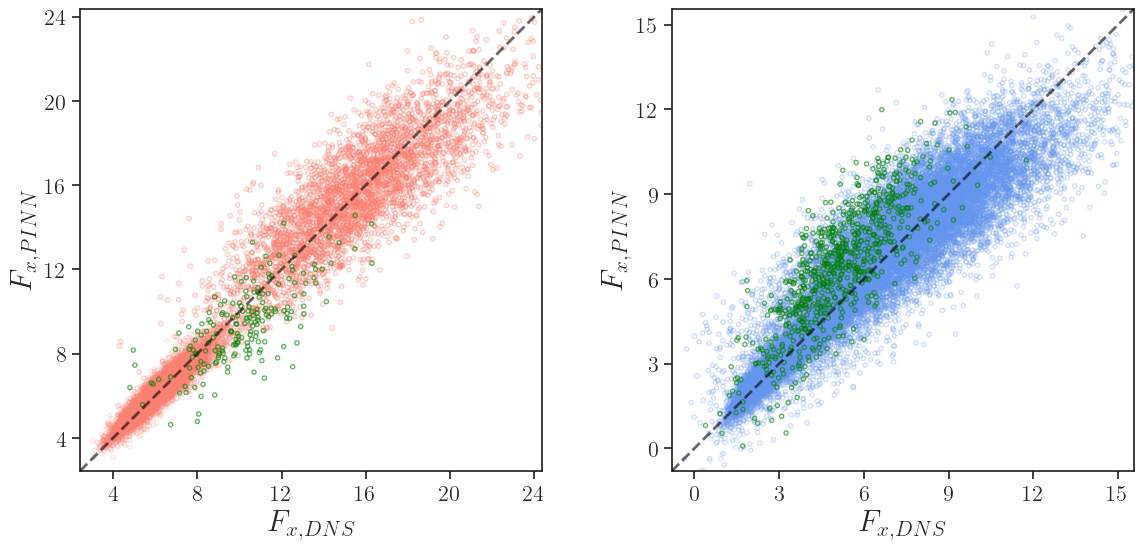

In [49]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Re1_Re10_Re100")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

# liml1 = 0.9*np.min(Y_large_test_plot[:,0])
# liml2 = 0.9*np.max(Y_large_test_plot[:,0])
# lims1 = 0.8*np.min(Y_small_test_plot[:,0])
# lims2 = 0.8*np.max(Y_small_test_plot[:,0])

check_index = 2
condition1 = 1
condition2 = 10
condition3 = 100

large_test_Re1    = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_test_Re10   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re100  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==100,Y_large_test_plot[:,3]==15)]
# large_test_Re1000 = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re1    = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_pred_Re10   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re100  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==100,Y_large_test_plot[:,3]==15)]
# large_pred_Re1000 = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
small_test_Re1    = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_test_Re10   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re100  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==100,Y_small_test_plot[:,3]==15)]
# small_test_Re1000 = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re1    = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_pred_Re10   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re100  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==100,Y_small_test_plot[:,3]==15)]
# small_pred_Re1000 = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]

liml1 = 0.8*np.min(large_test_Re1[:,0])
liml2 = 0.82*np.max(large_test_Re100[:,0])
lims1 = -0.8#0.8*np.min(small_test_Re1[:,0])
lims2 = 0.82*np.max(small_test_Re100[:,0])

LARGE_COLOR = 'salmon'
SMALL_COLOR = 'cornflowerblue'
TEST_COLOR = 'green'
ALPHA = 0.2
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


ax1.scatter(large_test_Re1[:,0], large_pred_Re1,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=4, label='Training data')
ax1.scatter(large_test_Re10[:,0], large_pred_Re10,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=3)
ax1.scatter(large_test_Re100[:,0], large_pred_Re100,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=2)
# ax1.scatter(large_test_Re1000[:,0], large_pred_Re1000,
#                 marker='o',
#                 s=9, linewidth=LINEWIDTH,
#                 alpha=ALPHA+0.2,
#                 edgecolor=LARGE_COLOR, facecolor='none', zorder=1)
ax1.scatter(large_test_Re40[:,0], large_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1[:,0], small_pred_Re1,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10[:,0], small_pred_Re10,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=3)
ax2.scatter(small_test_Re100[:,0], small_pred_Re100,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=2)
# ax2.scatter(small_test_Re1000[:,0], small_pred_Re1000,
#                 marker='o',
#                 s=9, linewidth=LINEWIDTH,
#                 alpha=ALPHA+0.1,
#                 edgecolor=SMALL_COLOR, facecolor='none', zorder=1)
ax2.scatter(small_test_Re40[:,0], small_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=4)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=6)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=6)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Uni_Re40.jpg", bbox_inches="tight",dpi=300)

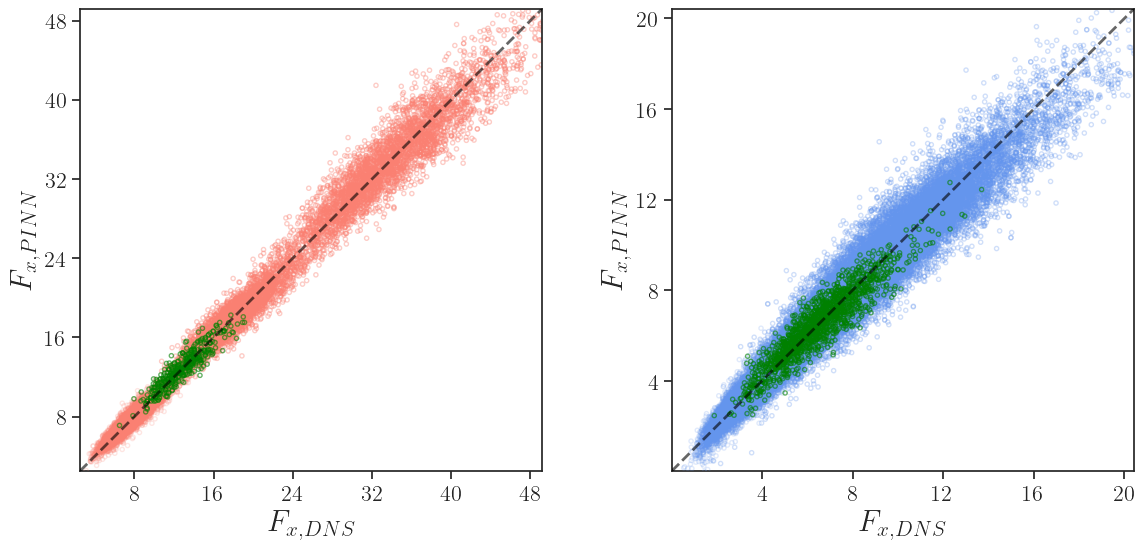

In [21]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Universal")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

# liml1 = 0.9*np.min(Y_large_test_plot[:,0])
# liml2 = 0.9*np.max(Y_large_test_plot[:,0])
# lims1 = 0.8*np.min(Y_small_test_plot[:,0])
# lims2 = 0.8*np.max(Y_small_test_plot[:,0])

check_index = 2
condition1 = 1
condition2 = 10
condition3 = 100

large_test_Re1    = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re10   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_test_Re100  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_test_Re1000 = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
large_pred_Re1    = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re10   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_pred_Re100  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_pred_Re1000 = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
small_test_Re1    = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re10   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_test_Re100  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_test_Re1000 = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]
small_pred_Re1    = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re10   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_pred_Re100  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_pred_Re1000 = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]

liml1 = 0.8*np.min(large_test_Re1[:,0])
liml2 = 0.82*np.max(large_test_Re1000[:,0])
lims1 = 0.02#0.6*np.min(small_pred_Re1[:,0])
lims2 = 0.7*np.max(small_pred_Re1000[:,0])

LARGE_COLOR = 'salmon'
SMALL_COLOR = 'cornflowerblue'
TEST_COLOR = 'green'
ALPHA = 0.2
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


ax1.scatter(large_test_Re1[:,0], large_pred_Re1,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=4, label='Training data')
ax1.scatter(large_test_Re10[:,0], large_pred_Re10,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=3)
ax1.scatter(large_test_Re100[:,0], large_pred_Re100,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=2)
ax1.scatter(large_test_Re1000[:,0], large_pred_Re1000,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=1)
ax1.scatter(large_test_Re40[:,0], large_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1[:,0], small_pred_Re1,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10[:,0], small_pred_Re10,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=3)
ax2.scatter(small_test_Re100[:,0], small_pred_Re100,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=2)
ax2.scatter(small_test_Re1000[:,0], small_pred_Re1000,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=1)
ax2.scatter(small_test_Re40[:,0], small_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=4)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=6)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=6)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Uni_inter_geo.jpg", bbox_inches="tight",dpi=300)

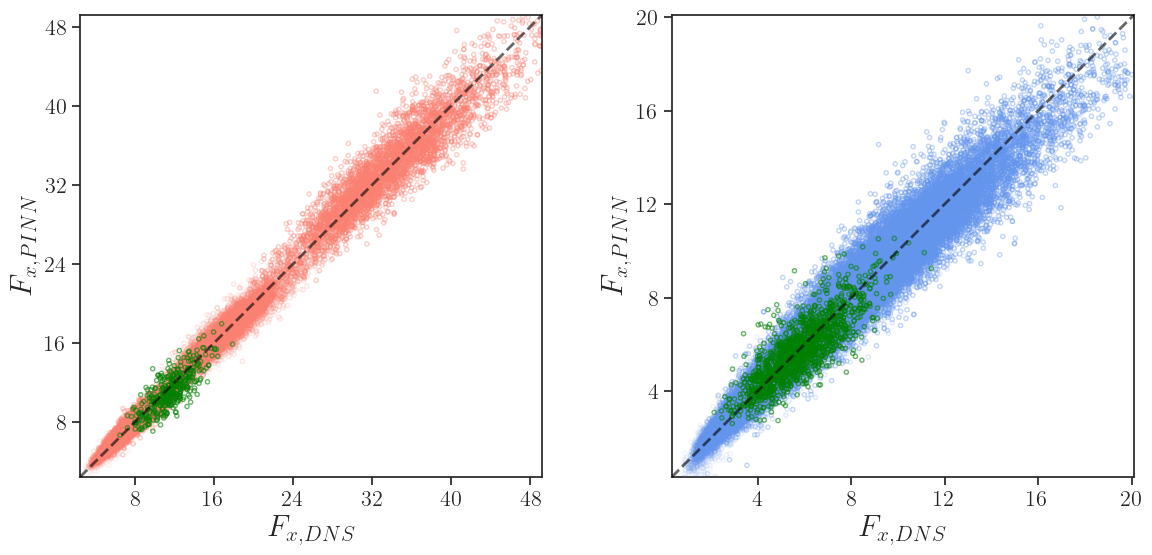

In [426]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Universal")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

liml1 = 0.8*np.min(Y_large_test_plot[:,0])
liml2 = 0.82*np.max(Y_large_test_plot[:,0])
lims1 = 0.6*np.min(Y_small_test_plot[:,0])
lims2 = 0.6*np.max(Y_small_test_plot[:,0])

check_index = 2
condition1 = 1
condition2 = 10
condition3 = 100

large_test_Re1_phi15   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_test_Re10_phi15  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re1_phi30   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi30  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi20  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_test_Re10_phi40  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
large_pred_Re1_phi15   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_pred_Re10_phi15  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re1_phi30   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi30  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi20  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_pred_Re10_phi40  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
small_test_Re1_phi15   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_test_Re10_phi15  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re1_phi30   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi30  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi20  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_test_Re10_phi40  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]
small_pred_Re1_phi15   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_pred_Re10_phi15  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re1_phi30   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi30  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi20  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_pred_Re10_phi40  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]

LARGE_COLOR = 'salmon'
SMALL_COLOR = 'cornflowerblue'
TEST_COLOR = 'green'
ALPHA = 0.2
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(large_test_Re1_phi15[:,0], large_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=6, label='Training data')
ax1.scatter(large_test_Re10_phi15[:,0], large_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=5)
ax1.scatter(large_test_Re1_phi30[:,0], large_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=3)
ax1.scatter(large_test_Re10_phi30[:,0], large_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=2, label='Training data')
ax1.scatter(large_test_Re10_phi20[:,0], large_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=4)
ax1.scatter(large_test_Re10_phi40[:,0], large_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=1)
ax1.scatter(large_test_Re40[:,0], large_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=7)
ax2.scatter(small_test_Re1_phi15[:,0], small_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=6, label='Training data')
ax2.scatter(small_test_Re10_phi15[:,0], small_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1_phi30[:,0], small_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=3)
ax2.scatter(small_test_Re10_phi30[:,0], small_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=2, label='Training data')
ax2.scatter(small_test_Re10_phi20[:,0], small_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10_phi40[:,0], small_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=1)
ax2.scatter(small_test_Re40[:,0], small_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=7)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=8)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=8)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Uni_inter_all.jpg", bbox_inches="tight",dpi=300)

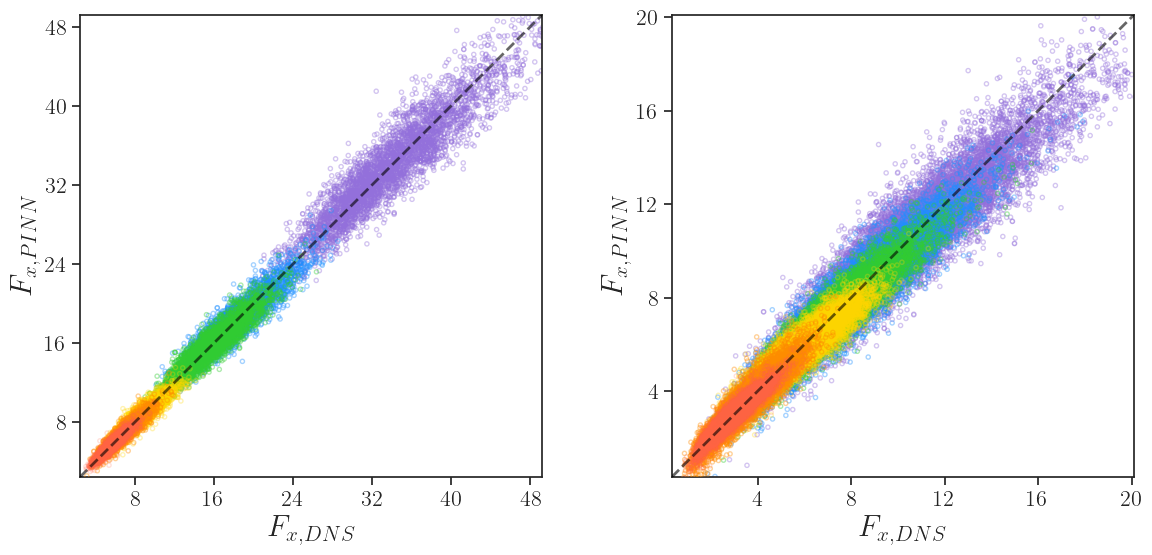

In [377]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Universal")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

liml1 = 0.8*np.min(Y_large_test_plot[:,0])
liml2 = 0.82*np.max(Y_large_test_plot[:,0])
lims1 = 0.6*np.min(Y_small_test_plot[:,0])
lims2 = 0.6*np.max(Y_small_test_plot[:,0])

large_test_Re1_phi15   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_test_Re10_phi15  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re1_phi30   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi30  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi20  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_test_Re10_phi40  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
large_pred_Re1_phi15   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_pred_Re10_phi15  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re1_phi30   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi30  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi20  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_pred_Re10_phi40  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
small_test_Re1_phi15   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_test_Re10_phi15  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re1_phi30   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi30  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi20  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_test_Re10_phi40  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]
small_pred_Re1_phi15   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_pred_Re10_phi15  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re1_phi30   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi30  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi20  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_pred_Re10_phi40  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]

COLOR1 = 'tomato'
COLOR2 = 'darkorange'
COLOR3 = 'gold'
COLOR4 = 'limegreen'
COLOR5 = 'dodgerblue'
COLOR6 = 'mediumpurple'
ALPHA = 0.4
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(large_test_Re1_phi15[:,0], large_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.2,
                edgecolor=COLOR1, facecolor='none', zorder=6, label='Training data')
ax1.scatter(large_test_Re10_phi15[:,0], large_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR2, facecolor='none', zorder=5)
ax1.scatter(large_test_Re1_phi30[:,0], large_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR4, facecolor='none', zorder=3)
ax1.scatter(large_test_Re10_phi30[:,0], large_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR5, facecolor='none', zorder=2, label='Training data')
ax1.scatter(large_test_Re10_phi20[:,0], large_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=COLOR3, facecolor='none', zorder=4)
ax1.scatter(large_test_Re10_phi40[:,0], large_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR6, facecolor='none', zorder=1)

ax2.scatter(small_test_Re1_phi15[:,0], small_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.2,
                edgecolor=COLOR1, facecolor='none', zorder=6, label='Training data')
ax2.scatter(small_test_Re10_phi15[:,0], small_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR2, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1_phi30[:,0], small_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR4, facecolor='none', zorder=3)
ax2.scatter(small_test_Re10_phi30[:,0], small_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR5, facecolor='none', zorder=2, label='Training data')
ax2.scatter(small_test_Re10_phi20[:,0], small_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=COLOR3, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10_phi40[:,0], small_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR6, facecolor='none', zorder=1)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=7)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=7)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Universal.jpg", bbox_inches="tight",dpi=300)

## Volume fraction ratio

In [3]:
%reset -f array
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# free up memory from previous plots_________________
plt.close('all')
plt.clf()

coord = r'F_x'
N_cases = 6

# load dataset _______________________________________
Re1 = 10
n_closest = 101
N_1 = 192
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi1 = 15
    r1 = 2
    v_ratio1 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi1 = 30
    r1 = 2
    v_ratio1 = 2
elif N_1 == 313:
    N_2 = 1222
    phi1 = 40
    r1 = 2.5
    v_ratio1 = 4
elif N_1 == 453:
    N_2 = 1528
    phi1 = 20
    r1 = 1.5
    v_ratio1 = 1

num_p_incl = 50
N_neurons = 30
epochs = 1000
lr = 4.e-3
verbose = 0
batch_size = 128

# coord, title = 'F_x', r'$ Re = ' + f'{Re},' + r' \phi = ' + f'{phi} $'

dataset = pd.read_csv(f'Datasets/Re{Re1}_phi0{phi1}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

col_n = -5

X_in = dataset[:, :-6]
X_in = np.hstack((X_in[:,:-5],np.ones(X_in.shape[0]).reshape(-1,1)*v_ratio1,X_in[:,-5:]))
Y_in = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in.shape[0]
Y_in = np.hstack([Y_in,np.ones((N,1))*int(Re1)])
Y_in = np.hstack([Y_in,np.ones((N,1))*int(phi1)])
Y_in = np.hstack([Y_in,np.ones((N,1))*int(r1)])

# #======================================================

Re2 = 10
N_1 = 453
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi2 = 15
    r2 = 2
    v_ratio2 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi2 = 30
    r2 = 2
    v_ratio2 = 2
elif N_1 == 313:
    N_2 = 1222
    phi2 = 40
    r2 = 2.5
    v_ratio2 = 4
elif N_1 == 453:
    N_2 = 1528
    phi2 = 20
    r2 = 1.5
    v_ratio2 = 1

dataset = pd.read_csv(f'Datasets/Re{Re2}_phi0{phi2}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
X_in_temp = np.hstack((X_in_temp[:,:-5],np.ones(X_in_temp.shape[0]).reshape(-1,1)*v_ratio2,X_in_temp[:,-5:]))
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re2)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi2)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r2)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

#======================================================

Re3 = 10
N_1 = 384
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi3 = 15
    r3 = 2
    v_ratio3 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi3 = 30
    r3 = 2
    v_ratio3 = 2
elif N_1 == 313:
    N_2 = 1222
    phi3 = 40
    r3 = 2.5
    v_ratio3 = 4
elif N_1 == 453:
    N_2 = 1528
    phi3 = 20
    r3 = 1.5
    v_ratio3 = 1

dataset = pd.read_csv(f'Datasets/Re{Re3}_phi0{phi3}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
X_in_temp = np.hstack((X_in_temp[:,:-5],np.ones(X_in_temp.shape[0]).reshape(-1,1)*v_ratio3,X_in_temp[:,-5:]))
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re3)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi3)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r3)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

#======================================================

Re4 = 10
N_1 = 313
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi4 = 15
    r4 = 2
    v_ratio4 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi4 = 30
    r4 = 2
    v_ratio4 = 2
elif N_1 == 313:
    N_2 = 1222
    phi4 = 40
    r4 = 2.5
    v_ratio4 = 4
elif N_1 == 453:
    N_2 = 1528
    phi4 = 20
    r4 = 1.5
    v_ratio4 = 1

dataset = pd.read_csv(f'Datasets/Re{Re4}_phi0{phi4}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
X_in_temp = np.hstack((X_in_temp[:,:-5],np.ones(X_in_temp.shape[0]).reshape(-1,1)*v_ratio4,X_in_temp[:,-5:]))
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re4)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi4)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r4)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

Y_largest = Y_in_temp[Y_in_temp[:,-4]>0.6]
HUBER_ALPHA = Y_largest[:,0].std()
print(HUBER_ALPHA)

#======================================================

Re5 = 1
N_1 = 192
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi5 = 15
    r5 = 2
    v_ratio5 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi5 = 30
    r5 = 2
    v_ratio5 = 2
elif N_1 == 313:
    N_2 = 1222
    phi5 = 40
    r5 = 2.5
    v_ratio5 = 4
elif N_1 == 453:
    N_2 = 1528
    phi5 = 20
    r5 = 1.5
    v_ratio5 = 1

dataset = pd.read_csv(f'Datasets/Re{Re5}_phi0{phi5}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
X_in_temp = np.hstack((X_in_temp[:,:-5],np.ones(X_in_temp.shape[0]).reshape(-1,1)*v_ratio5,X_in_temp[:,-5:]))
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re5)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi5)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r5)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

# ======================================================

Re6 = 1
N_1 = 384
if N_1 == 192: 
    N_2 = 768
    N_set = 20
    phi6 = 15
    r6 = 2
    v_ratio6 = 2
elif N_1 == 384:
    N_2 = 1536
    N_set = 10
    phi6 = 30
    r6 = 2
    v_ratio6 = 2
elif N_1 == 313:
    N_2 = 1222
    phi6 = 40
    r6 = 2.5
    v_ratio6 = 4
elif N_1 == 453:
    N_2 = 1528
    phi6 = 20
    r6 = 1.5
    v_ratio6 = 1

dataset = pd.read_csv(f'Datasets/Re{Re6}_phi0{phi6}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values

X_in_temp = dataset[:, :-6]
X_in_temp = np.hstack((X_in_temp[:,:-5],np.ones(X_in_temp.shape[0]).reshape(-1,1)*v_ratio6,X_in_temp[:,-5:]))
# X_in = np.delete(X_in,col_n,1)
Y_in_temp = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
N = Y_in_temp.shape[0]
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(Re6)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(phi6)])
Y_in_temp = np.hstack([Y_in_temp,np.ones((N,1))*int(r6)])

X_in = np.vstack([X_in,X_in_temp])
Y_in = np.vstack([Y_in,Y_in_temp])

#======================================================
    
X_large = X_in[X_in[:,col_n]>0.6]
Y_large = Y_in[X_in[:,col_n]>0.6]
V_large = X_large[:,col_n:]
X_small = X_in[X_in[:,col_n]<0.6]
Y_small = Y_in[X_in[:,col_n]<0.6]
V_small = X_small[:,col_n:]

print(Y_large[:,0].mean())
print(Y_small[:,0].mean())
print(Y_large[:,0].std())
    
N_folds = 5     
kf = KFold(n_splits=N_folds, shuffle=True)

large_train_scores = np.zeros((N_cases,N_folds))
small_train_scores = np.zeros((N_cases,N_folds))
large_test_scores = np.zeros((N_cases,N_folds))
small_test_scores = np.zeros((N_cases,N_folds))

train_scores = []
test_scores = []
large_train_scores_overall = []
small_train_scores_overall = []
large_test_scores_overall = []
small_test_scores_overall = []

X_test_plot = np.zeros((0, X_in.shape[1]))
Y_large_test_plot = np.zeros((0, Y_in.shape[1]))
Y_small_test_plot = np.zeros((0, Y_in.shape[1]))
Y_large_pred_test_plot = np.zeros((0, 1))
Y_small_pred_test_plot = np.zeros((0, 1))

print('Input shape:', X_in.shape)
print(f'# of neighbors in the dataset = {int((X_in.shape[1] - 5) / 4)}')
print(f'# of neighbors used for training = {num_p_incl}')
print('________________________________________')

q = -1
Total_time_train = 0
Total_time_test  = 0
# Train-Test split for K-fold cross-validation _______________________________________
for train_index, test_index in kf.split(X_in):
    
    q += 1
    print(f'+++++++++++++++++++++++++Fold {q+1:1d}+++++++++++++++++++++++++')

    X_train_list = []
    X_test_list = []
    X_large_in_train_list = []
    X_small_in_train_list = []
    X_large_in_test_list = []
    X_small_in_test_list = []
    p_input_list = []
    p_out_list = []
    
    X_train, X_test = X_in[train_index], X_in[test_index]
    Y_train, Y_test = Y_in[train_index], Y_in[test_index]
                    
    V_in_train = X_train[:, (col_n-1):]
    V_in_test  = X_test[:, (col_n-1):]
    
    print(V_in_train)
    
    X_train_tmp = X_train
    for p in range(0, 70):
        X_train_tmp[:,4*p+1] = -X_train_tmp[:,4*p+1]
    X_train = np.vstack((X_train,X_train_tmp))
    X_train_tmp = X_train
    for p in range(0, 70):
        X_train_tmp[:,4*p+2] = -X_train_tmp[:,4*p+2]
    X_train = np.vstack((X_train,X_train_tmp))
    Y_train = np.vstack((Y_train,Y_train))
    Y_train = np.vstack((Y_train,Y_train))
    V_in_train_tmp = V_in_train
    V_in_train_tmp[:,-2] = -V_in_train_tmp[:,-2]
    V_in_train = np.vstack((V_in_train,V_in_train_tmp))
    V_in_train_tmp = V_in_train
    V_in_train_tmp[:,-1] = -V_in_train_tmp[:,-1]
    V_in_train = np.vstack((V_in_train,V_in_train_tmp))
    
    '''
    Dataset 1: (Re,phi,r) = (1,15%,2)
    '''
    print(f'case1 = ({Re1},{phi1},{r1})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re1)
    condition = np.logical_and(condition,Y_train[:,-2]==phi1)
    X_large_in_train_1 = X_train[condition]
    Y_large_in_train_1 = Y_train[condition]
    V_large_in_train_1 = X_large_in_train_1[:,(col_n-1):]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re1)
    condition = np.logical_and(condition,Y_train[:,-2]==phi1)
    X_small_in_train_1 = X_train[condition]
    Y_small_in_train_1 = Y_train[condition]
    V_small_in_train_1 = X_small_in_train_1[:,(col_n-1):]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re1)
    condition = np.logical_and(condition,Y_test[:,-2]==phi1)
    X_large_in_test_1 = X_test[condition]
    Y_large_in_test_1 = Y_test[condition]
    V_large_in_test_1 = X_large_in_test_1[:,(col_n-1):]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re1)
    condition = np.logical_and(condition,Y_test[:,-2]==phi1)
    X_small_in_test_1 = X_test[condition]
    Y_small_in_test_1 = Y_test[condition]
    V_small_in_test_1 = X_small_in_test_1[:,(col_n-1):]
        
    '''
    Dataset 2: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case2 = ({Re2},{phi2},{r2})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re2)
    condition = np.logical_and(condition,Y_train[:,-2]==phi2)
    X_large_in_train_2 = X_train[condition]
    Y_large_in_train_2 = Y_train[condition]
    V_large_in_train_2 = X_large_in_train_2[:,(col_n-1):]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re2)
    condition = np.logical_and(condition,Y_train[:,-2]==phi2)
    X_small_in_train_2 = X_train[condition]
    Y_small_in_train_2 = Y_train[condition]
    V_small_in_train_2 = X_small_in_train_2[:,(col_n-1):]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re2)
    condition = np.logical_and(condition,Y_test[:,-2]==phi2)
    X_large_in_test_2 = X_test[condition]
    Y_large_in_test_2 = Y_test[condition]
    V_large_in_test_2 = X_large_in_test_2[:,(col_n-1):]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re2)
    condition = np.logical_and(condition,Y_test[:,-2]==phi2)
    X_small_in_test_2 = X_test[condition]
    Y_small_in_test_2 = Y_test[condition]
    V_small_in_test_2 = X_small_in_test_2[:,(col_n-1):]
    
    '''
    Dataset 3: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case3 = ({Re3},{phi3},{r3})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re3)
    condition = np.logical_and(condition,Y_train[:,-2]==phi3)
    X_large_in_train_3 = X_train[condition]
    Y_large_in_train_3 = Y_train[condition]
    V_large_in_train_3 = X_large_in_train_3[:,(col_n-1):]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re3)
    condition = np.logical_and(condition,Y_train[:,-2]==phi3)
    X_small_in_train_3 = X_train[condition]
    Y_small_in_train_3 = Y_train[condition]
    V_small_in_train_3 = X_small_in_train_3[:,(col_n-1):]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re3)
    condition = np.logical_and(condition,Y_test[:,-2]==phi3)
    X_large_in_test_3 = X_test[condition]
    Y_large_in_test_3 = Y_test[condition]
    V_large_in_test_3 = X_large_in_test_3[:,(col_n-1):]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re3)
    condition = np.logical_and(condition,Y_test[:,-2]==phi3)
    X_small_in_test_3 = X_test[condition]
    Y_small_in_test_3 = Y_test[condition]
    V_small_in_test_3 = X_small_in_test_3[:,(col_n-1):]
    
    '''
    Dataset 4: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case4 = ({Re4},{phi4},{r4})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re4)
    condition = np.logical_and(condition,Y_train[:,-2]==phi4)
    X_large_in_train_4 = X_train[condition]
    Y_large_in_train_4 = Y_train[condition]
    V_large_in_train_4 = X_large_in_train_4[:,(col_n-1):]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re4)
    condition = np.logical_and(condition,Y_train[:,-2]==phi4)
    X_small_in_train_4 = X_train[condition]
    Y_small_in_train_4 = Y_train[condition]
    V_small_in_train_4 = X_small_in_train_4[:,(col_n-1):]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re4)
    condition = np.logical_and(condition,Y_test[:,-2]==phi4)
    X_large_in_test_4 = X_test[condition]
    Y_large_in_test_4 = Y_test[condition]
    V_large_in_test_4 = X_large_in_test_4[:,(col_n-1):]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re4)
    condition = np.logical_and(condition,Y_test[:,-2]==phi4)
    X_small_in_test_4 = X_test[condition]
    Y_small_in_test_4 = Y_test[condition]
    V_small_in_test_4 = X_small_in_test_4[:,(col_n-1):]
    
    '''
    Dataset 5: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case5 = ({Re5},{phi5},{r5})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re5)
    condition = np.logical_and(condition,Y_train[:,-2]==phi5)
    X_large_in_train_5 = X_train[condition]
    Y_large_in_train_5 = Y_train[condition]
    V_large_in_train_5 = X_large_in_train_5[:,(col_n-1):]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re5)
    condition = np.logical_and(condition,Y_train[:,-2]==phi5)
    X_small_in_train_5 = X_train[condition]
    Y_small_in_train_5 = Y_train[condition]
    V_small_in_train_5 = X_small_in_train_5[:,(col_n-1):]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re5)
    condition = np.logical_and(condition,Y_test[:,-2]==phi5)
    X_large_in_test_5 = X_test[condition]
    Y_large_in_test_5 = Y_test[condition]
    V_large_in_test_5 = X_large_in_test_5[:,(col_n-1):]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re5)
    condition = np.logical_and(condition,Y_test[:,-2]==phi5)
    X_small_in_test_5 = X_test[condition]
    Y_small_in_test_5 = Y_test[condition]
    V_small_in_test_5 = X_small_in_test_5[:,(col_n-1):]
    
    '''
    Dataset 6: (Re,phi,r) = (10,15%,2)
    '''
    print(f'case6 = ({Re6},{phi6},{r6})')
    condition = np.logical_and(X_train[:,col_n]>0.6,Y_train[:,-3]==Re6)
    condition = np.logical_and(condition,Y_train[:,-2]==phi6)
    X_large_in_train_6 = X_train[condition]
    Y_large_in_train_6 = Y_train[condition]
    V_large_in_train_6 = X_large_in_train_6[:,(col_n-1):]
    condition = np.logical_and(X_train[:,col_n]<0.6,Y_train[:,-3]==Re6)
    condition = np.logical_and(condition,Y_train[:,-2]==phi6)
    X_small_in_train_6 = X_train[condition]
    Y_small_in_train_6 = Y_train[condition]
    V_small_in_train_6 = X_small_in_train_6[:,(col_n-1):]
    
    condition = np.logical_and(X_test[:,col_n]>0.6,Y_test[:,-3]==Re6)
    condition = np.logical_and(condition,Y_test[:,-2]==phi6)
    X_large_in_test_6 = X_test[condition]
    Y_large_in_test_6 = Y_test[condition]
    V_large_in_test_6 = X_large_in_test_6[:,(col_n-1):]
    condition = np.logical_and(X_test[:,col_n]<0.6,Y_test[:,-3]==Re6)
    condition = np.logical_and(condition,Y_test[:,-2]==phi6)
    X_small_in_test_6 = X_test[condition]
    Y_small_in_test_6 = Y_test[condition]
    V_small_in_test_6 = X_small_in_test_6[:,(col_n-1):]
    
# ===============================================================================
    
#     X_large_in_train = X_train[X_train[:,col_n]>0.6]
#     Y_large_in_train = Y_train[X_train[:,col_n]>0.6]
#     V_large_in_train = X_large_in_train[:,col_n:]
#     X_small_in_train = X_train[X_train[:,col_n]<0.6]
#     Y_small_in_train = Y_train[X_train[:,col_n]<0.6]
#     V_small_in_train = X_small_in_train[:,col_n:]
    
#     X_large_in_test = X_test[X_test[:,col_n]>0.6]
#     Y_large_in_test = Y_test[X_test[:,col_n]>0.6]
#     V_large_in_test = X_large_in_test[:,col_n:]
#     X_small_in_test = X_test[X_test[:,col_n]<0.6]
#     Y_small_in_test = Y_test[X_test[:,col_n]<0.6]
#     V_small_in_test = X_small_in_test[:,col_n:]

    '''
    Integrate all the datasets
    '''
    # X_large_in_train = [X_large_in_train_1,X_large_in_train_2]
    # X_small_in_train = [X_small_in_train_1,X_small_in_train_2]
    # X_large_in_test = [X_large_in_test_1,X_large_in_test_2]
    # X_small_in_test = [X_small_in_test_1,X_small_in_test_2]
    # Y_large_in_train = [Y_large_in_train_1,Y_large_in_train_2]
    # Y_small_in_train = [Y_small_in_train_1,Y_small_in_train_2]
    # Y_large_in_test = [Y_large_in_test_1,Y_large_in_test_2]
    # Y_small_in_test = [Y_small_in_test_1,Y_small_in_test_2]
    # V_large_in_train = [V_large_in_train_1,V_large_in_train_2]
    # V_small_in_train = [V_small_in_train_1,V_small_in_train_2]
    # V_large_in_test = [V_large_in_test_1,V_large_in_test_2]
    # V_small_in_test = [V_small_in_test_1,V_small_in_test_2]
    
    # X_large_in_train = [X_large_in_train_1,X_large_in_train_2,X_large_in_train_3,X_large_in_train_4]
    # X_small_in_train = [X_small_in_train_1,X_small_in_train_2,X_small_in_train_3,X_small_in_train_4]
    # X_large_in_test = [X_large_in_test_1,X_large_in_test_2,X_large_in_test_3,X_large_in_test_4]
    # X_small_in_test = [X_small_in_test_1,X_small_in_test_2,X_small_in_test_3,X_small_in_test_4]
    # Y_large_in_train = [Y_large_in_train_1,Y_large_in_train_2,Y_large_in_train_3,Y_large_in_train_4]
    # Y_small_in_train = [Y_small_in_train_1,Y_small_in_train_2,Y_small_in_train_3,Y_small_in_train_4]
    # Y_large_in_test = [Y_large_in_test_1,Y_large_in_test_2,Y_large_in_test_3,Y_large_in_test_4]
    # Y_small_in_test = [Y_small_in_test_1,Y_small_in_test_2,Y_small_in_test_3,Y_small_in_test_4]
    # V_large_in_train = [V_large_in_train_1,V_large_in_train_2,V_large_in_train_3,V_large_in_train_4]
    # V_small_in_train = [V_small_in_train_1,V_small_in_train_2,V_small_in_train_3,V_small_in_train_4]
    # V_large_in_test = [V_large_in_test_1,V_large_in_test_2,V_large_in_test_3,V_large_in_test_4]
    # V_small_in_test = [V_small_in_test_1,V_small_in_test_2,V_small_in_test_3,V_small_in_test_4]
    
    X_large_in_train = [X_large_in_train_1,X_large_in_train_2,X_large_in_train_3,X_large_in_train_4,X_large_in_train_5,X_large_in_train_6]
    X_small_in_train = [X_small_in_train_1,X_small_in_train_2,X_small_in_train_3,X_small_in_train_4,X_small_in_train_5,X_small_in_train_6]
    X_large_in_test = [X_large_in_test_1,X_large_in_test_2,X_large_in_test_3,X_large_in_test_4,X_large_in_test_5,X_large_in_test_6]
    X_small_in_test = [X_small_in_test_1,X_small_in_test_2,X_small_in_test_3,X_small_in_test_4,X_small_in_test_5,X_small_in_test_6]
    Y_large_in_train = [Y_large_in_train_1,Y_large_in_train_2,Y_large_in_train_3,Y_large_in_train_4,Y_large_in_train_5,Y_large_in_train_6]
    Y_small_in_train = [Y_small_in_train_1,Y_small_in_train_2,Y_small_in_train_3,Y_small_in_train_4,Y_small_in_train_5,Y_small_in_train_6]
    Y_large_in_test = [Y_large_in_test_1,Y_large_in_test_2,Y_large_in_test_3,Y_large_in_test_4,Y_large_in_test_5,Y_large_in_test_6]
    Y_small_in_test = [Y_small_in_test_1,Y_small_in_test_2,Y_small_in_test_3,Y_small_in_test_4,Y_small_in_test_5,Y_small_in_test_6]
    V_large_in_train = [V_large_in_train_1,V_large_in_train_2,V_large_in_train_3,V_large_in_train_4,V_large_in_train_5,V_large_in_train_6]
    V_small_in_train = [V_small_in_train_1,V_small_in_train_2,V_small_in_train_3,V_small_in_train_4,V_small_in_train_5,V_small_in_train_6]
    V_large_in_test = [V_large_in_test_1,V_large_in_test_2,V_large_in_test_3,V_large_in_test_4,V_large_in_test_5,V_large_in_test_6]
    V_small_in_test = [V_small_in_test_1,V_small_in_test_2,V_small_in_test_3,V_small_in_test_4,V_small_in_test_5,V_small_in_test_6]
        
    print("===========Number of samples in each sets===========")
    print("++Training set++")
    print(f'Case 1 large: {X_large_in_train_1.shape[0]}')
    print(f'Case 1 small: {X_small_in_train_1.shape[0]}')
    print(f'Case 2 large: {X_large_in_train_2.shape[0]}')
    print(f'Case 2 small: {X_small_in_train_2.shape[0]}')
    print(f'Case 3 large: {X_large_in_train_3.shape[0]}')
    print(f'Case 3 small: {X_small_in_train_3.shape[0]}')
    print(f'Case 4 large: {X_large_in_train_4.shape[0]}')
    print(f'Case 4 small: {X_small_in_train_4.shape[0]}')
    print(f'Case 5 large: {X_large_in_train_5.shape[0]}')
    print(f'Case 5 small: {X_small_in_train_5.shape[0]}')
    print(f'Case 6 large: {X_large_in_train_6.shape[0]}')
    print(f'Case 6 small: {X_small_in_train_6.shape[0]}')
    print("++Test set++")
    print(f'Case 1 large: {X_large_in_test_1.shape[0]}')
    print(f'Case 1 small: {X_small_in_test_1.shape[0]}')
    print(f'Case 2 large: {X_large_in_test_2.shape[0]}')
    print(f'Case 2 small: {X_small_in_test_2.shape[0]}')
    print(f'Case 3 large: {X_large_in_test_3.shape[0]}')
    print(f'Case 3 small: {X_small_in_test_3.shape[0]}')
    print(f'Case 4 large: {X_large_in_test_4.shape[0]}')
    print(f'Case 4 small: {X_small_in_test_4.shape[0]}')
    print(f'Case 5 large: {X_large_in_test_5.shape[0]}')
    print(f'Case 5 small: {X_small_in_test_5.shape[0]}')
    print(f'Case 6 large: {X_large_in_test_6.shape[0]}')
    print(f'Case 6 small: {X_small_in_test_6.shape[0]}')
    
    print("===========Average force/torque===========")
    print("++Training set++")
    print(f'Case 1 large: {np.mean(Y_large_in_train_1[:,0])}')
    print(f'Case 1 small: {np.mean(Y_small_in_train_1[:,0])}')
    print(f'Case 2 large: {np.mean(Y_large_in_train_2[:,0])}')
    print(f'Case 2 small: {np.mean(Y_small_in_train_2[:,0])}')
    print(f'Case 3 large: {np.mean(Y_large_in_train_3[:,0])}')
    print(f'Case 3 small: {np.mean(Y_small_in_train_3[:,0])}')
    print(f'Case 4 large: {np.mean(Y_large_in_train_4[:,0])}')
    print(f'Case 4 small: {np.mean(Y_small_in_train_4[:,0])}')
    print(f'Case 5 large: {np.mean(Y_large_in_train_5[:,0])}')
    print(f'Case 5 small: {np.mean(Y_small_in_train_5[:,0])}')
    print(f'Case 6 large: {np.mean(Y_large_in_train_6[:,0])}')
    print(f'Case 6 small: {np.mean(Y_small_in_train_6[:,0])}')
    
    print("++Test set++")
    print(f'Case 1 large: {np.mean(Y_large_in_test_1[:,0])}')
    print(f'Case 1 small: {np.mean(Y_small_in_test_1[:,0])}')
    print(f'Case 2 large: {np.mean(Y_large_in_test_2[:,0])}')
    print(f'Case 2 small: {np.mean(Y_small_in_test_2[:,0])}')
    print(f'Case 3 large: {np.mean(Y_large_in_test_3[:,0])}')
    print(f'Case 3 small: {np.mean(Y_small_in_test_3[:,0])}')
    print(f'Case 4 large: {np.mean(Y_large_in_test_4[:,0])}')
    print(f'Case 4 small: {np.mean(Y_small_in_test_4[:,0])}')
    print(f'Case 5 large: {np.mean(Y_large_in_test_5[:,0])}')
    print(f'Case 5 small: {np.mean(Y_small_in_test_5[:,0])}')
    print(f'Case 6 large: {np.mean(Y_large_in_test_6[:,0])}')
    print(f'Case 6 small: {np.mean(Y_small_in_test_6[:,0])}')
    
    # Training =======================================
    glorot = tf.keras.initializers.GlorotNormal()
        
    # Custom neural network _______________________________________
    p_shared_layer1 = Dense(N_neurons,
                            activation='elu',
                            kernel_initializer=glorot,
                            name='p_shared1')
    
    p_shared_layer2 = Dense(N_neurons,
                            activation='elu',
                            kernel_initializer=glorot,
                            name='p_shared2')
    
    p_shared_layer3 = Dense(N_neurons,
                            activation='elu',
                            kernel_initializer=glorot,
                            name='p_shared3')
    
#     p_shared_layer4 = Dense(N_neurons,
#                             activation='elu',
#                             kernel_initializer=glorot,
#                             name='p_shared4')
    
#     p_shared_layer5 = Dense(N_neurons,
#                             activation='tanh',
#                             kernel_initializer=glorot,
#                             name='p_shared5')
    
    V_input = Input(shape=V_in_train.shape[1], name='V_in')
    
    V_layer = Dense(N_neurons,
                     activation='elu',
                     kernel_initializer=glorot,
                     name='V_layer1')(V_input)
    
    V_layer = Dense(N_neurons,
                     activation='elu',
                     kernel_initializer=glorot,
                     name='V_layer2')(V_layer)
    
    V_layer = Dense(N_neurons,
                     activation='elu',
                     kernel_initializer=glorot,
                     name='V_layer3')(V_layer)
    
#     V_layer = Dense(N_neurons,
#                      activation='elu',
#                      kernel_initializer=glorot,
#                      name='V_layer4')(V_layer)
    
#     V_layer = Dense(N_neurons,
#                      activation='relu',
#                      kernel_initializer=glorot,
#                      name='V_layer5')(V_layer)
    
    def summation(p_tensor):
        '''
        Each individual neighbor contribution to drag is
        always directed along the x-direction.
        '''
        # Drag _______________________________________
        return tf.reduce_sum(p_tensor, axis=1, keepdims=True)
    #_______________________________________________________________________________

    for p in range(0, num_p_incl):
        X_train_list.append( X_train[:, 4*p:4*p+4])
        p_input_list.append( Input(shape=4, name=f'p_r{p}') )
        # p_out_list.append( tf.keras.layers.Multiply()([tf.keras.layers.Multiply()
        #                   ([p_shared_layer2(p_shared_layer1(p_input_list[p])),V_layer])
        #                                                ,R_input]) )
        # p_out_list.append( tf.keras.layers.Multiply()([p_shared_layer2(p_shared_layer1(p_input_list[p]))
        #                                                ,V_layer]) )
        p_out_list.append( tf.keras.layers.Multiply()([p_shared_layer3(p_shared_layer2(p_shared_layer1(p_input_list[p])))
                                                       ,V_layer]) )
        # p_out_list.append( tf.keras.layers.Multiply()([p_shared_layer4(p_shared_layer3(p_shared_layer2(p_shared_layer1(p_input_list[p]))))
        #                                                ,V_layer]) )

    concat = Concatenate()(
        [Lambda(summation, name=f'summation{j}')(p_out_list[j])\
        for j in range(num_p_incl)])
    
    # concat = tf.keras.layers.Multiply()([concat, V_layer])

    nonneg = tf.keras.constraints.NonNeg()

    # output_layer = Dense(1,
    #                     activation='elu',
    #                     name='out_x',
    #                     )(concat)
    
    output_layer = Dense(1,
                        activation='linear',
                        kernel_constraint=nonneg,
                        name='out_x',
                        use_bias=False
                        )(concat)
    
    # Neural net fitting _______________________________________

    def R2(y_true, y_pred):
        '''
        This function computes the R^2 for the callback function.
        '''
        SS_res = K.sum(K.square(y_true[:,[0]] - y_pred)) 
        SS_tot_large = K.sum(K.square(y_true[y_true[:,1]>0.6,[0]] - K.mean(K.constant(y_true[y_true[:,1]>0.6,[0]])))) 
        SS_tot_small = K.sum(K.square(y_true[y_true[:,1]<0.6,[0]] - K.mean(K.constant(y_true[y_true[:,1]<0.6,[0]])))) 
        SS_res = tf.cast(SS_res, tf.float32)
        SS_tot_large = tf.cast(SS_tot_large, tf.float32)
        SS_tot_small = tf.cast(SS_tot_small, tf.float32)
        
        return 1 - SS_res / (SS_tot_large + SS_tot_small + K.epsilon())
    
    def R2_val(y_true, y_pred):
        '''
        This function computes the R^2 for the callback function.
        '''
        SS_res = K.sum(K.square(y_true - y_pred)) 
        SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
        return 1 - SS_res / (SS_tot + K.epsilon())
    
    model = Model(inputs=p_input_list + [V_input], outputs=output_layer)

    myoptimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    EarlyStop = EarlyStopping(monitor='val_loss', patience=30, min_delta=0.0005)
    LRDecay = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_delta=0.001)

    he = tf.keras.losses.Huber(delta=HUBER_ALPHA)
    model.compile(loss=he, optimizer=myoptimizer, metrics=[metrics.mean_squared_error])
    
    history_drag = model.fit(
                            X_train_list + [V_in_train],
                            Y_train[:,[0]],

                            validation_split=0.2,
                            shuffle=True,
                            epochs=epochs,
                            verbose=verbose,
                            batch_size=batch_size,
                            callbacks=[EarlyStop,LRDecay],
                            )
    
    start_time = time.perf_counter()
    Y_pred = model.predict(X_train_list + [V_in_train])
    end_time = time.perf_counter()
    print(f'CPU time: {end_time-start_time:.3f} for {Y_pred.shape[0]:8d} datapoints')
    Total_time_train += end_time-start_time
    
    print(f'Train R^2\t= {R2(Y_train, Y_pred):.3f}\n')
    print(f'～～～～～～～～～～～～～～～～～')
    print(f'|Large Train R^2\t= {R2(Y_train[Y_train[:,-4]>0.6], Y_pred[Y_train[:,-4]>0.6]):.3f}|')
    print(f'|Small Train R^2\t= {R2(Y_train[Y_train[:,-4]<0.6], Y_pred[Y_train[:,-4]<0.6]):.3f}|')
    print(f'～～～～～～～～～～～～～～～～～\n')
    train_scores.append(R2(Y_train, Y_pred))
    large_train_scores_overall.append(R2(Y_train[Y_train[:,-4]>0.6], Y_pred[Y_train[:,-4]>0.6]))
    small_train_scores_overall.append(R2(Y_train[Y_train[:,-4]<0.6], Y_pred[Y_train[:,-4]<0.6]))
    
    # Testing =======================================
    for p in range(0, num_p_incl):
        X_test_list.append( X_test[:, 4*p:4*p+4] )
        
    start_time = time.perf_counter()
    Y_pred_test = model.predict(X_test_list + [V_in_test])
    end_time = time.perf_counter()
    print(f'CPU time: {end_time-start_time:.3f} for {Y_pred_test.shape[0]:8d} datapoints')
    Total_time_test += end_time-start_time
    
    print(f'Test R^2\t= {R2(Y_test, Y_pred_test):.3f}\n')
    print(f'～～～～～～～～～～～～～～～～～')
    print(f'|Large Test R^2\t= {R2(Y_test[Y_test[:,-4]>0.6], Y_pred_test[Y_test[:,-4]>0.6]):.3f}|')
    print(f'|Small Test R^2\t= {R2(Y_test[Y_test[:,-4]<0.6], Y_pred_test[Y_test[:,-4]<0.6]):.3f}|')
    print(f'～～～～～～～～～～～～～～～～～\n')
    test_scores.append(R2(Y_test, Y_pred_test))
    large_test_scores_overall.append(R2(Y_test[Y_test[:,-4]>0.6], Y_pred_test[Y_test[:,-4]>0.6]))
    small_test_scores_overall.append(R2(Y_test[Y_test[:,-4]<0.6], Y_pred_test[Y_test[:,-4]<0.6]))
    
    # Y_large_test_plot = np.vstack((Y_large_test_plot, Y_test[Y_test[:,-4]>0.6,:-1]))
    # Y_large_pred_test_plot = np.vstack((Y_large_pred_test_plot, Y_pred_test[Y_test[:,-4]>0.6]))
    # Y_small_test_plot = np.vstack((Y_small_test_plot, Y_test[Y_test[:,-4]<0.6,:-1]))
    # Y_small_pred_test_plot = np.vstack((Y_small_pred_test_plot, Y_pred_test[Y_test[:,-4]<0.6]))
    
    for i in range(N_cases):
        X_large_in_train_list = []
        X_small_in_train_list = []
        X_large_in_test_list = []
        X_small_in_test_list = []
        for p in range(0, num_p_incl):
            X_large_in_train_list.append( X_large_in_train[i][:, 4*p:4*p+4] )

        Y_large_train = model.predict(X_large_in_train_list + [V_large_in_train[i]])
    
        print(f'Case {i+1}: Large Train R^2\t= {R2_val(K.constant(Y_large_in_train[i][:,[0]]), K.constant(Y_large_train)):.3f}\n')
        large_train_scores[i,q] = R2_val(K.constant(Y_large_in_train[i][:,[0]]), K.constant(Y_large_train))
    
        for p in range(0, num_p_incl):
            X_small_in_train_list.append( X_small_in_train[i][:, 4*p:4*p+4] )

        Y_small_train = model.predict(X_small_in_train_list + [V_small_in_train[i]])
    
        print(f'Case {i+1}: Small Train R^2\t= {R2_val(K.constant(Y_small_in_train[i][:,[0]]), K.constant(Y_small_train)):.3f}\n')
        small_train_scores[i,q] = R2_val(K.constant(Y_small_in_train[i][:,[0]]), K.constant(Y_small_train))
    
        for p in range(0, num_p_incl):
            X_large_in_test_list.append( X_large_in_test[i][:, 4*p:4*p+4] )

        Y_large_test = model.predict(X_large_in_test_list + [V_large_in_test[i]])
    
        print(f'Case {i+1}: Large Test R^2\t= {R2_val(K.constant(Y_large_in_test[i][:,[0]]), K.constant(Y_large_test)):.3f}\n')
        large_test_scores[i,q] = R2_val(K.constant(Y_large_in_test[i][:,[0]]), K.constant(Y_large_test))
    
        for p in range(0, num_p_incl):
            X_small_in_test_list.append( X_small_in_test[i][:, 4*p:4*p+4] )

        Y_small_test = model.predict(X_small_in_test_list + [V_small_in_test[i]])
    
        print(f'Case {i+1}: Small Test R^2\t= {R2_val(K.constant(Y_small_in_test[i][:,[0]]), K.constant(Y_small_test)):.3f}\n')
        small_test_scores[i,q] = R2_val(K.constant(Y_small_in_test[i][:,[0]]), K.constant(Y_small_test))
        
        Y_large_test_plot = np.vstack((Y_large_test_plot, Y_large_in_test[i][:,:]))
        Y_large_pred_test_plot = np.vstack((Y_large_pred_test_plot, Y_large_test))
        Y_small_test_plot = np.vstack((Y_small_test_plot, Y_small_in_test[i][:,:]))
        Y_small_pred_test_plot = np.vstack((Y_small_pred_test_plot, Y_small_test))
    
    os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")
    model.save(f'uni_model_Re_{q+1}.h5')
    os.chdir("../../")
    
    print(f'++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
    
os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")
np.save(f'uni_model_Re_large_true_drag.npy',Y_large_test_plot)
np.save(f'uni_model_Re_large_pred_drag.npy',Y_large_pred_test_plot)
np.save(f'uni_model_Re_small_true_drag.npy',Y_small_test_plot)
np.save(f'uni_model_Re_small_pred_drag.npy',Y_small_pred_test_plot)
os.chdir("../../")

Average_train_scores = np.mean(train_scores)
Average_test_scores = np.mean(test_scores)
Average_large_train_scores = np.mean(large_train_scores_overall)
Average_small_train_scores = np.mean(small_train_scores_overall)
Average_large_test_scores  = np.mean(large_test_scores_overall)
Average_small_test_scores  = np.mean(small_test_scores_overall)

print('========================================\nOverall performance:')
print(f'<Average Train R^2> = {Average_train_scores:.3f}')
print(f'<Average Test R^2> = {Average_test_scores:.3f}')
print(f'<Average Large Train R^2> = {Average_large_train_scores:.3f}')
print(f'<Average Small Train R^2> = {Average_small_train_scores:.3f}')
print(f'<Average Large Test R^2>  = {Average_large_test_scores:.3f}')
print(f'<Average Small Test R^2>  = {Average_small_test_scores:.3f}')
for i in range(N_cases):
    print(f'<Case {i+1} average Large Train R^2> = {np.mean(large_train_scores[i,:]):.3f}')
    print(f'<Case {i+1} average Small Train R^2> = {np.mean(small_train_scores[i,:]):.3f}')
    print(f'<Case {i+1} average Large Test R^2>  = {np.mean(large_test_scores[i,:]):.3f}')
    print(f'<Case {i+1} average Small Test R^2>  = {np.mean(small_test_scores[i,:]):.3f}')
print(f'<Average Train time> = {(Total_time_train/5):.3f}')
print(f'<Average Test time> = {(Total_time_test/5):.3f}')

print(f'\nTotal number of model parameters: {model.count_params()}\n')
# os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")
# model.save(f'uni_model_Re.h5')
# os.chdir("../../")
model.summary()

5.765627354575274
14.791382371820696
6.09249159259371
10.263219723242427
Input shape: (116565, 406)
# of neighbors in the dataset = 100
# of neighbors used for training = 50
________________________________________
+++++++++++++++++++++++++Fold 1+++++++++++++++++++++++++
[[ 2.00000000e+00  1.00000000e+00  1.33017000e-01  9.98630305e+00
  -3.87306909e-01 -4.68085476e-01]
 [ 2.00000000e+00  1.00000000e+00  1.55501000e-01  1.00607937e+01
   2.58670835e-02  5.67994193e-01]
 [ 2.00000000e+00  1.00000000e+00  2.02571000e-01  8.96789899e+00
  -3.81248313e-01  1.03830863e-01]
 ...
 [ 2.00000000e+00  5.00000000e-01  3.22186000e-01  8.22789412e-01
   2.66357867e-02 -1.34341411e-02]
 [ 2.00000000e+00  5.00000000e-01  2.63550000e-01  9.96442741e-01
  -3.99416822e-02  7.86538956e-03]
 [ 2.00000000e+00  5.00000000e-01  2.75702000e-01  1.16516348e+00
  -7.53418741e-03 -6.83194371e-02]]
case1 = (10,15,2)
case2 = (10,20,1.5)
case3 = (10,30,2)
case4 = (10,40,2.5)
case5 = (1,15,2)
case6 = (1,30,2)
======

<Figure size 640x480 with 0 Axes>

In [16]:
from tensorflow.keras.models import load_model
os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Universal_v_ratio")
model_re = load_model(f'uni_model_Re_2.h5')
os.chdir("../../../../")

def R2_val(y_true, y_pred):
    '''
    This function computes the R^2 for the callback function.
    '''
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res / (SS_tot + K.epsilon())

n_closest = 101
col_n = -5
num_p_incl = 50
Re = 10
phi = 40
N_1 = 313
v_ratio = 2
dataset = pd.read_csv(f'Datasets/Re{Re}_phi0{phi}_M={n_closest}_{N_1}L',
                        header=None, delim_whitespace=True).values
# dataset = dataset[:960,:]

X_in_Re40 = dataset[:, :-6]
X_in_Re40 = np.hstack((X_in_Re40[:,:-5],np.ones(X_in_Re40.shape[0]).reshape(-1,1)*v_ratio,X_in_Re40[:,-5:]))
Y_in_Re40 = np.hstack([dataset[:, [-3]],dataset[:, [-11]]])
V_in_Re40 = X_in_Re40[:,(col_n-1):]

X_large_Re40 = X_in_Re40[X_in_Re40[:,col_n]>0.6]
large_test_Re40 = Y_in_Re40[X_in_Re40[:,col_n]>0.6]
V_large_Re40 = X_large_Re40[:,(col_n-1):]
X_small_Re40 = X_in_Re40[X_in_Re40[:,col_n]<0.6]
small_test_Re40 = Y_in_Re40[X_in_Re40[:,col_n]<0.6]
V_small_Re40 = X_small_Re40[:,(col_n-1):]

# X_large_list_Re40 = []
# X_small_list_Re40 = []
# for p in range(0, num_p_incl):
#     X_large_list_Re40.append( X_large_Re40[:, 4*p:4*p+4])
#     X_small_list_Re40.append( X_small_Re40[:, 4*p:4*p+4])

# large_pred_Re40 = model_re.predict(X_large_list_Re40+[V_large_Re40])
# small_pred_Re40 = model_re.predict(X_small_list_Re40+[V_small_Re40])

X_list_Re40 = []
for p in range(0, num_p_incl):
    X_list_Re40.append(X_in_Re40[:, 4*p:4*p+4])
pred_Re40 = model_re.predict(X_list_Re40+[V_in_Re40])

large_pred_Re40 = pred_Re40[Y_in_Re40[:,-1]>0.6]
small_pred_Re40 = pred_Re40[Y_in_Re40[:,-1]<0.6]

print(f'Large R^2 = {R2_val(K.constant(large_test_Re40[:,[0]]), K.constant(large_pred_Re40)):.3f}')
print(f'Small R^2 = {R2_val(K.constant(small_test_Re40[:,[0]]), K.constant(small_pred_Re40)):.3f}')

624/624 [==============================] - 5s 7ms/step
Large R^2 = -1.841
Small R^2 = 0.680


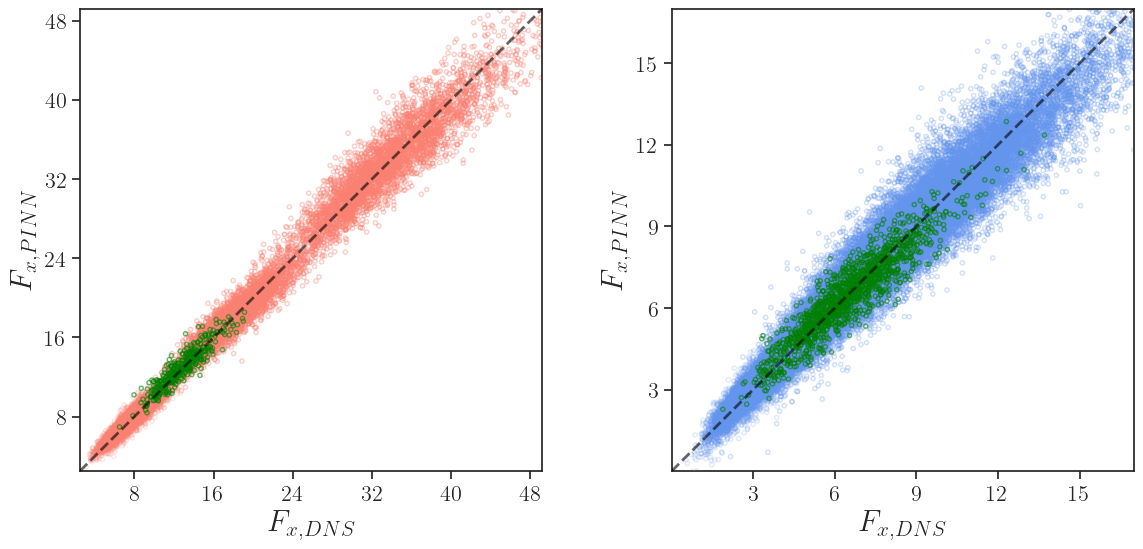

In [61]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/All_Re10_v_ratio")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

# liml1 = 0.9*np.min(Y_large_test_plot[:,0])
# liml2 = 0.9*np.max(Y_large_test_plot[:,0])
# lims1 = 0.8*np.min(Y_small_test_plot[:,0])
# lims2 = 0.8*np.max(Y_small_test_plot[:,0])

check_index = 2
condition1 = 1
condition2 = 10
condition3 = 100

large_test_Re1    = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re10   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_test_Re100  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_test_Re1000 = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
large_pred_Re1    = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re10   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_pred_Re100  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_pred_Re1000 = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
small_test_Re1    = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re10   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_test_Re100  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_test_Re1000 = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]
small_pred_Re1    = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re10   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_pred_Re100  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_pred_Re1000 = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]

liml1 = 0.8*np.min(large_test_Re1[:,0])
liml2 = 0.82*np.max(large_test_Re1000[:,0])
lims1 = 0.02#0.6*np.min(small_pred_Re1[:,0])
lims2 = 0.7*np.max(small_pred_Re1000[:,0])

LARGE_COLOR = 'salmon'
SMALL_COLOR = 'cornflowerblue'
TEST_COLOR = 'green'
ALPHA = 0.2
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


ax1.scatter(large_test_Re1[:,0], large_pred_Re1,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=4, label='Training data')
ax1.scatter(large_test_Re10[:,0], large_pred_Re10,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=3)
ax1.scatter(large_test_Re100[:,0], large_pred_Re100,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=2)
ax1.scatter(large_test_Re1000[:,0], large_pred_Re1000,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=1)
ax1.scatter(large_test_Re40[:,0], large_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1[:,0], small_pred_Re1,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10[:,0], small_pred_Re10,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=3)
ax2.scatter(small_test_Re100[:,0], small_pred_Re100,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=2)
ax2.scatter(small_test_Re1000[:,0], small_pred_Re1000,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=1)
ax2.scatter(small_test_Re40[:,0], small_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=4)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=6)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=6)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Uni_v_ratio_inter_geo.jpg", bbox_inches="tight",dpi=300)

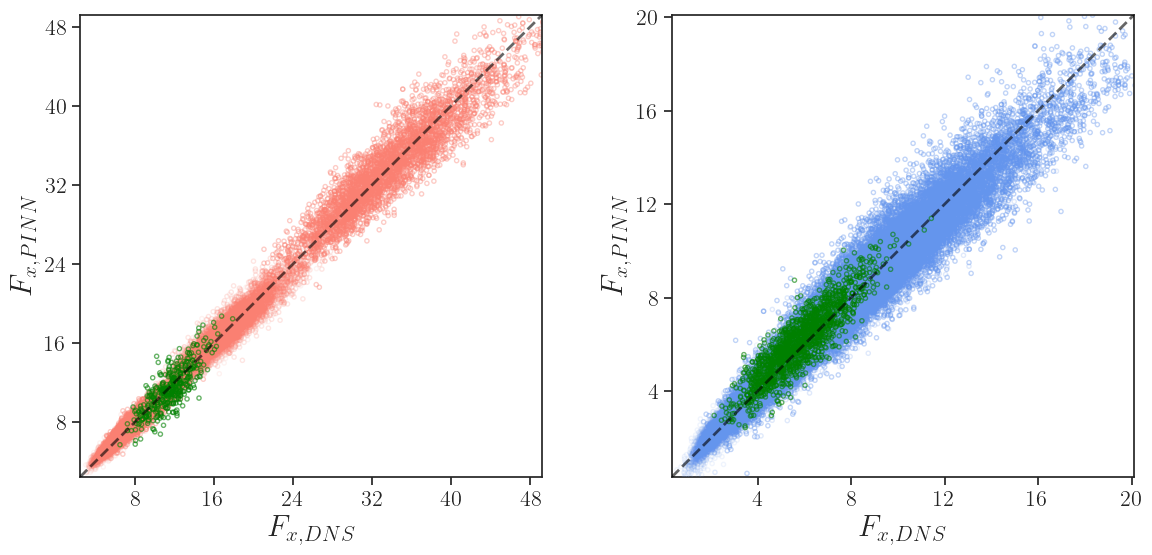

In [42]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Universal_v_ratio")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

liml1 = 0.8*np.min(Y_large_test_plot[:,0])
liml2 = 0.82*np.max(Y_large_test_plot[:,0])
lims1 = 0.6*np.min(Y_small_test_plot[:,0])
lims2 = 0.6*np.max(Y_small_test_plot[:,0])

check_index = 2
condition1 = 1
condition2 = 10
condition3 = 100

large_test_Re1_phi15   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_test_Re10_phi15  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re1_phi30   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi30  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi20  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_test_Re10_phi40  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
large_pred_Re1_phi15   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_pred_Re10_phi15  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re1_phi30   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi30  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi20  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_pred_Re10_phi40  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
small_test_Re1_phi15   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_test_Re10_phi15  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re1_phi30   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi30  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi20  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_test_Re10_phi40  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]
small_pred_Re1_phi15   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_pred_Re10_phi15  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re1_phi30   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi30  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi20  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_pred_Re10_phi40  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]

LARGE_COLOR = 'salmon'
SMALL_COLOR = 'cornflowerblue'
TEST_COLOR = 'green'
ALPHA = 0.2
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(large_test_Re1_phi15[:,0], large_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=6, label='Training data')
ax1.scatter(large_test_Re10_phi15[:,0], large_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=5)
ax1.scatter(large_test_Re1_phi30[:,0], large_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=3)
ax1.scatter(large_test_Re10_phi30[:,0], large_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=2, label='Training data')
ax1.scatter(large_test_Re10_phi20[:,0], large_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=4)
ax1.scatter(large_test_Re10_phi40[:,0], large_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=LARGE_COLOR, facecolor='none', zorder=1)
ax1.scatter(large_test_Re40[:,0], large_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=7)
ax2.scatter(small_test_Re1_phi15[:,0], small_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=6, label='Training data')
ax2.scatter(small_test_Re10_phi15[:,0], small_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1_phi30[:,0], small_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=3)
ax2.scatter(small_test_Re10_phi30[:,0], small_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=2, label='Training data')
ax2.scatter(small_test_Re10_phi20[:,0], small_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10_phi40[:,0], small_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA+0.2,
                edgecolor=SMALL_COLOR, facecolor='none', zorder=1)
ax2.scatter(small_test_Re40[:,0], small_pred_Re40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=0.6,
                edgecolor=TEST_COLOR, facecolor='none', zorder=7)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=8)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=8)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Uni_v_ratio_inter_all.jpg", bbox_inches="tight",dpi=300)

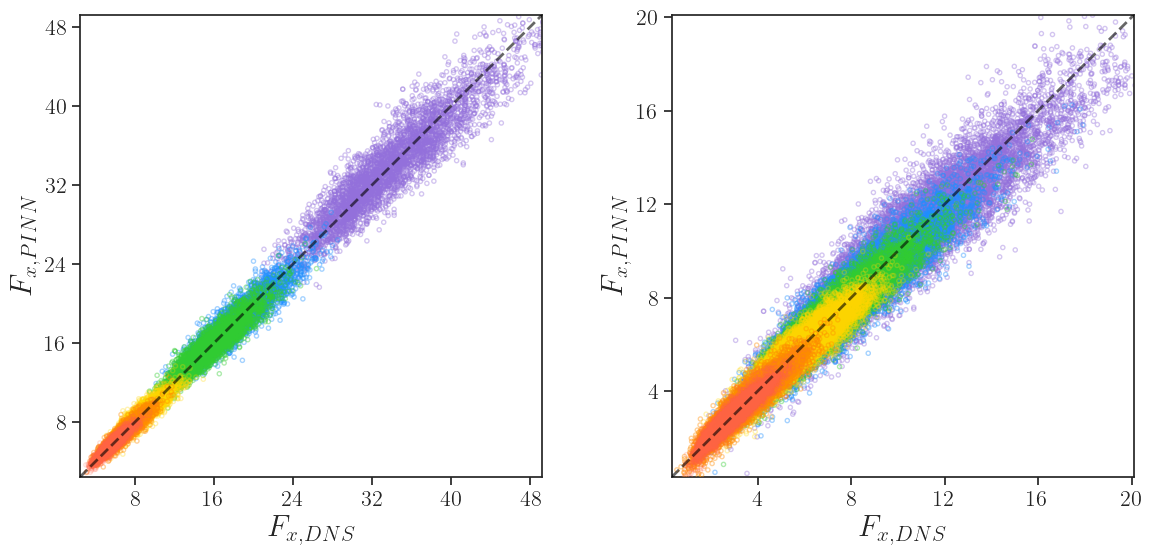

In [43]:
from matplotlib import rc
import matplotlib.font_manager
import seaborn as sns
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)

sns.set_theme(style='white')
sns.set(style="ticks")
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3/models/Universal_v_ratio")
Y_large_test_plot = np.load(f'uni_model_Re_large_true_drag.npy')
Y_large_pred_test_plot = np.load(f'uni_model_Re_large_pred_drag.npy')
Y_small_test_plot = np.load(f'uni_model_Re_small_true_drag.npy')
Y_small_pred_test_plot = np.load(f'uni_model_Re_small_pred_drag.npy')

liml1 = 0.8*np.min(Y_large_test_plot[:,0])
liml2 = 0.82*np.max(Y_large_test_plot[:,0])
lims1 = 0.6*np.min(Y_small_test_plot[:,0])
lims2 = 0.6*np.max(Y_small_test_plot[:,0])

large_test_Re1_phi15   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_test_Re10_phi15  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_test_Re1_phi30   = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi30  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_test_Re10_phi20  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_test_Re10_phi40  = Y_large_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
large_pred_Re1_phi15   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==15)]
large_pred_Re10_phi15  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==15)]
large_pred_Re1_phi30   = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==1,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi30  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==30)]
large_pred_Re10_phi20  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==20)]
large_pred_Re10_phi40  = Y_large_pred_test_plot[np.logical_and(Y_large_test_plot[:,2]==10,Y_large_test_plot[:,3]==40)]
small_test_Re1_phi15   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_test_Re10_phi15  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_test_Re1_phi30   = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi30  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_test_Re10_phi20  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_test_Re10_phi40  = Y_small_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]
small_pred_Re1_phi15   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==15)]
small_pred_Re10_phi15  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==15)]
small_pred_Re1_phi30   = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==1,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi30  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==30)]
small_pred_Re10_phi20  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==20)]
small_pred_Re10_phi40  = Y_small_pred_test_plot[np.logical_and(Y_small_test_plot[:,2]==10,Y_small_test_plot[:,3]==40)]

COLOR1 = 'tomato'
COLOR2 = 'darkorange'
COLOR3 = 'gold'
COLOR4 = 'limegreen'
COLOR5 = 'dodgerblue'
COLOR6 = 'mediumpurple'
ALPHA = 0.4
SMALL_LABEL = 16
LINEWIDTH = 1

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(large_test_Re1_phi15[:,0], large_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.2,
                edgecolor=COLOR1, facecolor='none', zorder=6, label='Training data')
ax1.scatter(large_test_Re10_phi15[:,0], large_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR2, facecolor='none', zorder=5)
ax1.scatter(large_test_Re1_phi30[:,0], large_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR4, facecolor='none', zorder=3)
ax1.scatter(large_test_Re10_phi30[:,0], large_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR5, facecolor='none', zorder=2, label='Training data')
ax1.scatter(large_test_Re10_phi20[:,0], large_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=COLOR3, facecolor='none', zorder=4)
ax1.scatter(large_test_Re10_phi40[:,0], large_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR6, facecolor='none', zorder=1)

ax2.scatter(small_test_Re1_phi15[:,0], small_pred_Re1_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.2,
                edgecolor=COLOR1, facecolor='none', zorder=6, label='Training data')
ax2.scatter(small_test_Re10_phi15[:,0], small_pred_Re10_phi15,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR2, facecolor='none', zorder=5)
ax2.scatter(small_test_Re1_phi30[:,0], small_pred_Re1_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR4, facecolor='none', zorder=3)
ax2.scatter(small_test_Re10_phi30[:,0], small_pred_Re10_phi30,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR5, facecolor='none', zorder=2, label='Training data')
ax2.scatter(small_test_Re10_phi20[:,0], small_pred_Re10_phi20,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA-0.1,
                edgecolor=COLOR3, facecolor='none', zorder=4)
ax2.scatter(small_test_Re10_phi40[:,0], small_pred_Re10_phi40,
                marker='o',
                s=9, linewidth=LINEWIDTH,
                alpha=ALPHA,
                edgecolor=COLOR6, facecolor='none', zorder=1)

ax1.plot([liml1, liml2], [liml1, liml2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=7)
ax1.set_xlim((1.0*liml1, 1.0*liml2))
ax1.set_ylim((1.0*liml1, 1.0*liml2))
ax1.set_aspect('equal')
ax1.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax1.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax1.xaxis.set_major_locator(MaxNLocator(6))
ax1.yaxis.set_major_locator(MaxNLocator(6))
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax2.plot([lims1, lims2], [lims1, lims2], linestyle='--', color='black', linewidth=2, alpha=0.6, zorder=7)
ax2.set_xlim((1.0*lims1, 1.0*lims2))
ax2.set_ylim((1.0*lims1, 1.0*lims2))
ax2.set_aspect('equal')
ax2.set_xlabel(r'$F_{x,DNS}$',fontsize=22)
ax2.set_ylabel(r'$F_{x,PINN}$',fontsize=22)
ax2.xaxis.set_major_locator(MaxNLocator(6))
ax2.yaxis.set_major_locator(MaxNLocator(6))
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/")
fig.savefig(f"Plots/Universal_v_ratio.jpg", bbox_inches="tight",dpi=300)